# Insurance Claims- Fraud Detection

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('insurance claim fraud detection.csv')
df = pd.DataFrame(data = df)
df.head(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
5,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,NO,64100,6410,6410,51280,Saab,95,2003,Y,NaN
6,137,34,413978,04-06-2000,IN,250/500,1000,1333.35,0,441716,...,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N,NaN
7,165,37,429027,03-02-1990,IL,100/300,1000,1137.03,0,603195,...,YES,51590,9380,9380,32830,Audi,A5,2015,N,NaN
8,27,33,485665,05-02-1997,IL,100/300,500,1442.99,0,601734,...,YES,27700,2770,2770,22160,Toyota,Camry,2012,N,NaN
9,212,42,636550,25-07-2011,IL,100/300,500,1315.68,0,600983,...,?,42300,4700,4700,32900,Saab,92x,1996,N,NaN


In [6]:
df.shape

(1000, 40)

In [7]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [8]:
df.apply(lambda x: len(x.unique()))

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [9]:
df.drop(['_c39'], axis = 1, inplace = True)

In [10]:
df.shape

(1000, 39)

In [11]:
s = (df.dtypes == 'object')
cate_cols = list(s[s].index)

print("Categorical variables:")
print(cate_cols)

Categorical variables:
['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']


In [12]:
s = (df.dtypes == 'int64')
cont_cols = list(s[s].index)

print("Continuous variables:")
print(cont_cols)

Continuous variables:
['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']


In [13]:
cont_cols.append('policy_annual_premium')

In [14]:
df[cate_cols].head(10)

,policy_bind_date,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,...,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model,fraud_reported
0,17-10-2014,OH,250/500,MALE,MD,craft-repair,sleeping,husband,25-01-2015,Single Vehicle Collision,...,Major Damage,Police,SC,Columbus,9935 4th Drive,YES,YES,Saab,92x,Y
1,27-06-2006,IN,250/500,MALE,MD,machine-op-inspct,reading,other-relative,21-01-2015,Vehicle Theft,...,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,?,?,Mercedes,E400,Y
2,06-09-2000,OH,100/300,FEMALE,PhD,sales,board-games,own-child,22-02-2015,Multi-vehicle Collision,...,Minor Damage,Police,NY,Columbus,7121 Francis Lane,NO,NO,Dodge,RAM,N
3,25-05-1990,IL,250/500,FEMALE,PhD,armed-forces,board-games,unmarried,10-01-2015,Single Vehicle Collision,...,Major Damage,Police,OH,Arlington,6956 Maple Drive,?,NO,Chevrolet,Tahoe,Y
4,06-06-2014,IL,500/1000,MALE,Associate,sales,board-games,unmarried,17-02-2015,Vehicle Theft,...,Minor Damage,None,NY,Arlington,3041 3rd Ave,NO,NO,Accura,RSX,N
5,12-10-2006,OH,250/500,FEMALE,PhD,tech-support,bungie-jumping,unmarried,02-01-2015,Multi-vehicle Collision,...,Major Damage,Fire,SC,Arlington,8973 Washington St,NO,NO,Saab,95,Y
6,04-06-2000,IN,250/500,MALE,PhD,prof-specialty,board-games,husband,13-01-2015,Multi-vehicle Collision,...,Minor Damage,Police,NY,Springfield,5846 Weaver Drive,?,?,Nissan,Pathfinder,N
7,03-02-1990,IL,100/300,MALE,Associate,tech-support,base-jumping,unmarried,27-02-2015,Multi-vehicle Collision,...,Total Loss,Police,VA,Columbus,3525 3rd Hwy,?,YES,Audi,A5,N
8,05-02-1997,IL,100/300,FEMALE,PhD,other-service,golf,own-child,30-01-2015,Single Vehicle Collision,...,Total Loss,Police,WV,Arlington,4872 Rock Ridge,NO,YES,Toyota,Camry,N
9,25-07-2011,IL,100/300,MALE,PhD,priv-house-serv,camping,wife,05-01-2015,Single Vehicle Collision,...,Total Loss,Other,NC,Hillsdale,3066 Francis Ave,NO,?,Saab,92x,N


In [15]:
df[cont_cols].head(10)

,months_as_customer,age,policy_number,policy_deductable,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,policy_annual_premium
0,328,48,521585,1000,0,466132,53300,0,5,1,1,2,71610,6510,13020,52080,2004,1406.91
1,228,42,342868,2000,5000000,468176,0,0,8,1,0,0,5070,780,780,3510,2007,1197.22
2,134,29,687698,2000,5000000,430632,35100,0,7,3,2,3,34650,7700,3850,23100,2007,1413.14
3,256,41,227811,2000,6000000,608117,48900,-62400,5,1,1,2,63400,6340,6340,50720,2014,1415.74
4,228,44,367455,1000,6000000,610706,66000,-46000,20,1,0,1,6500,1300,650,4550,2009,1583.91
5,256,39,104594,1000,0,478456,0,0,19,3,0,2,64100,6410,6410,51280,2003,1351.10
6,137,34,413978,1000,0,441716,0,-77000,0,3,0,0,78650,21450,7150,50050,2012,1333.35
7,165,37,429027,1000,0,603195,0,0,23,3,2,2,51590,9380,9380,32830,2015,1137.03
8,27,33,485665,500,0,601734,0,0,21,1,1,1,27700,2770,2770,22160,2012,1442.99
9,212,42,636550,500,0,600983,0,-39300,14,1,2,1,42300,4700,4700,32900,1996,1315.68


In [16]:
df[cont_cols].describe()

,months_as_customer,age,policy_number,policy_deductable,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,policy_annual_premium
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,1256.406150
std,115.113174,9.140287,257063.005276,611.864673,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,244.167395
min,0.000000,19.000000,100804.000000,500.000000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,433.330000
25%,115.750000,32.000000,335980.250000,500.000000,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,1089.607500
50%,199.500000,38.000000,533135.000000,1000.000000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,1257.200000
75%,276.250000,44.000000,759099.750000,2000.000000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,1415.695000
max,479.000000,64.000000,999435.000000,2000.000000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,2047.590000


In [17]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

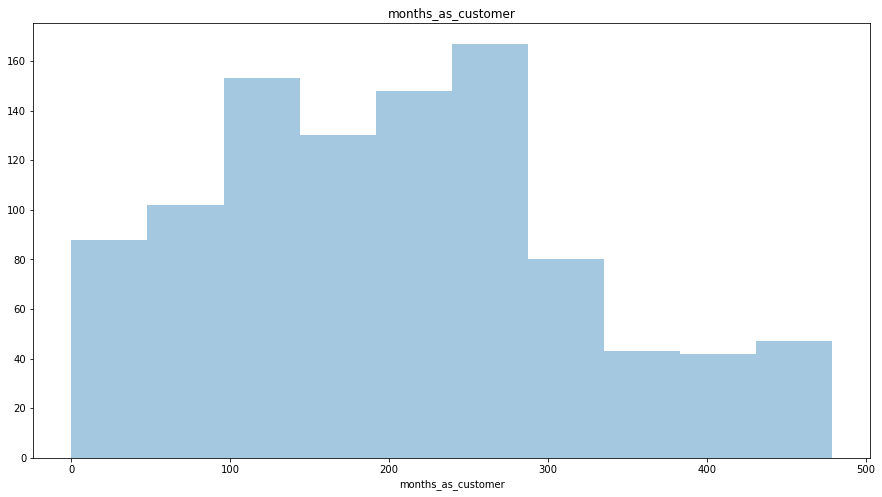

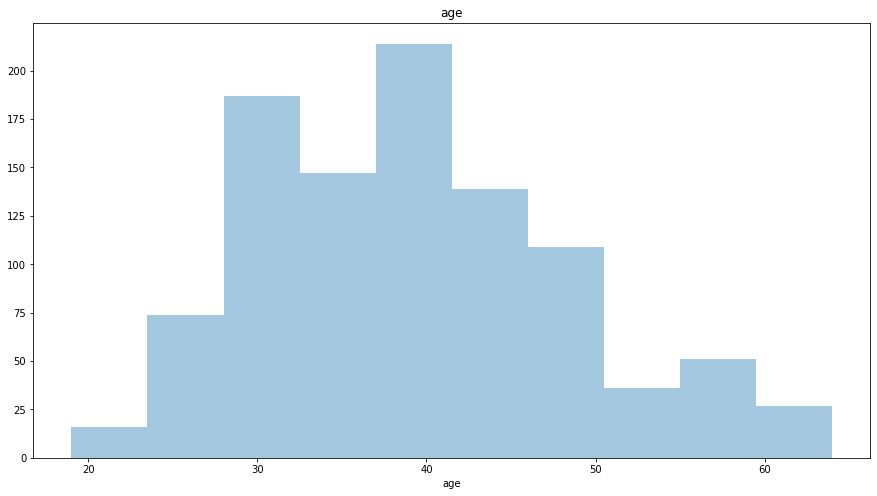

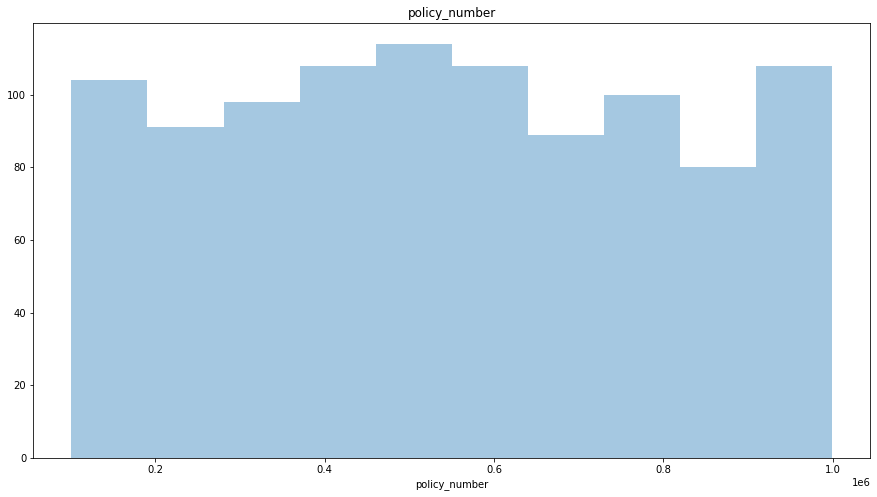

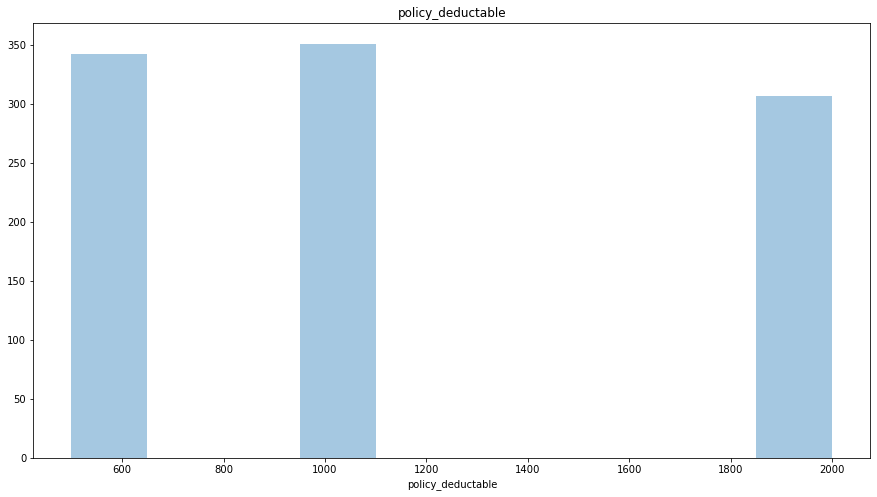

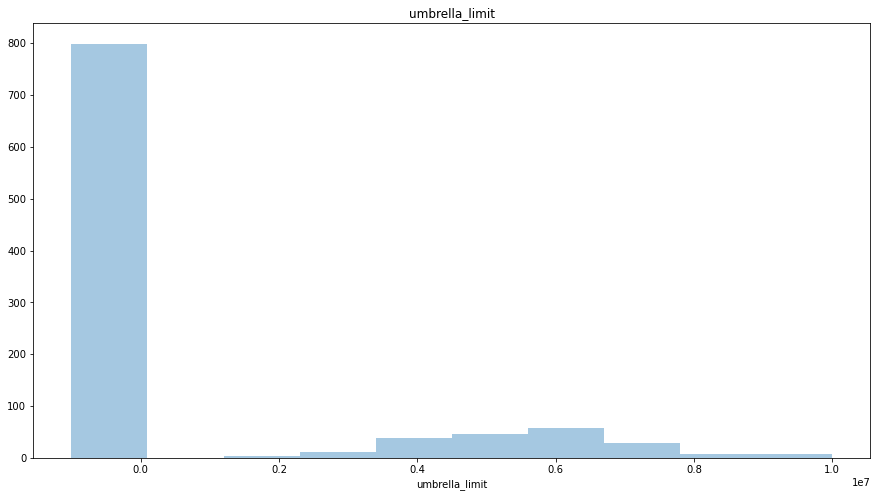

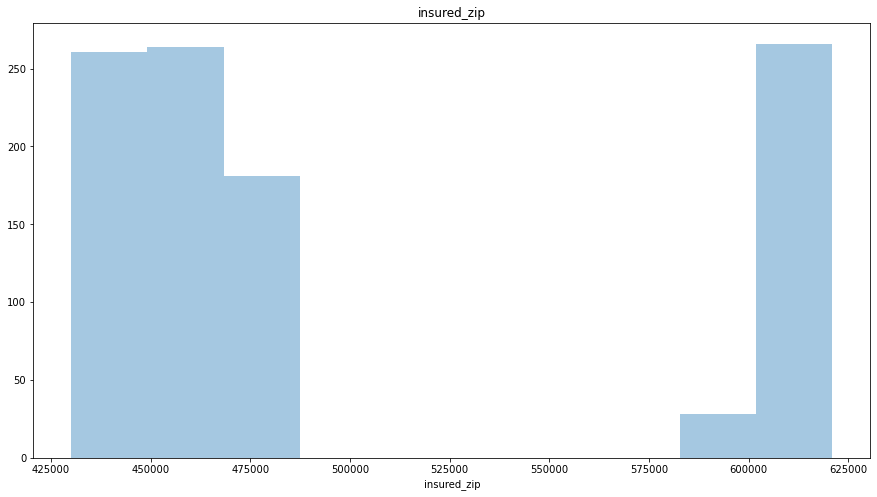

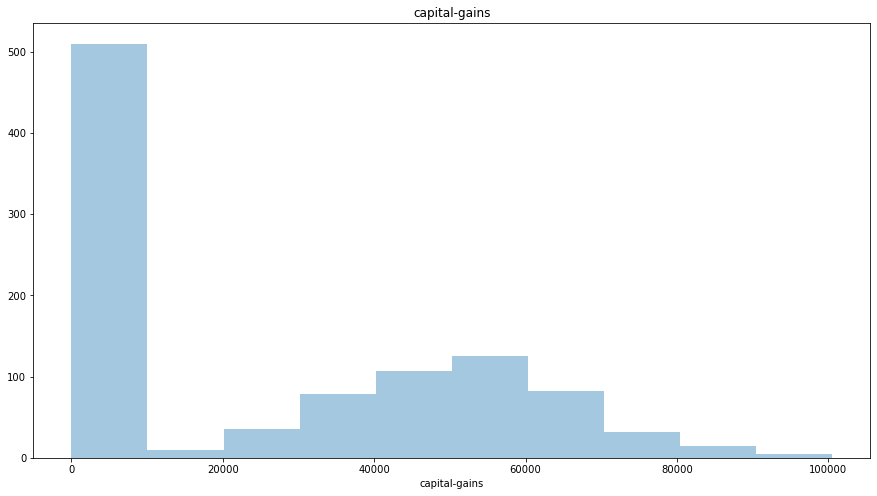

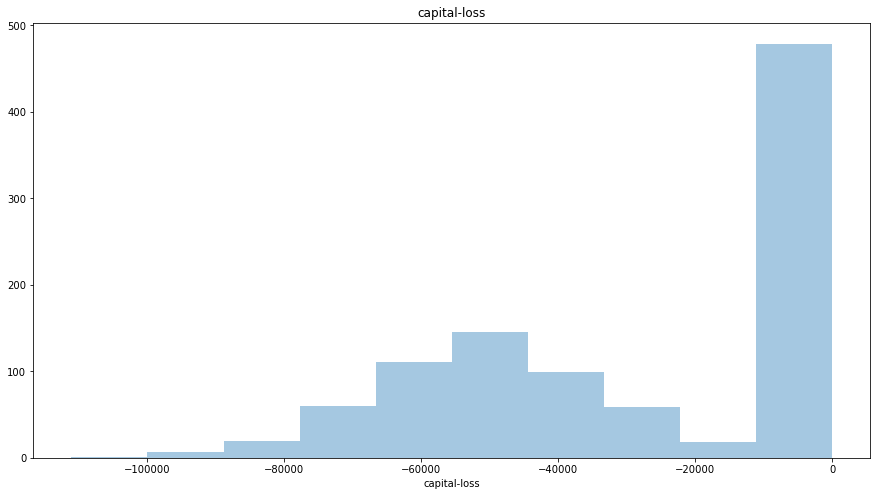

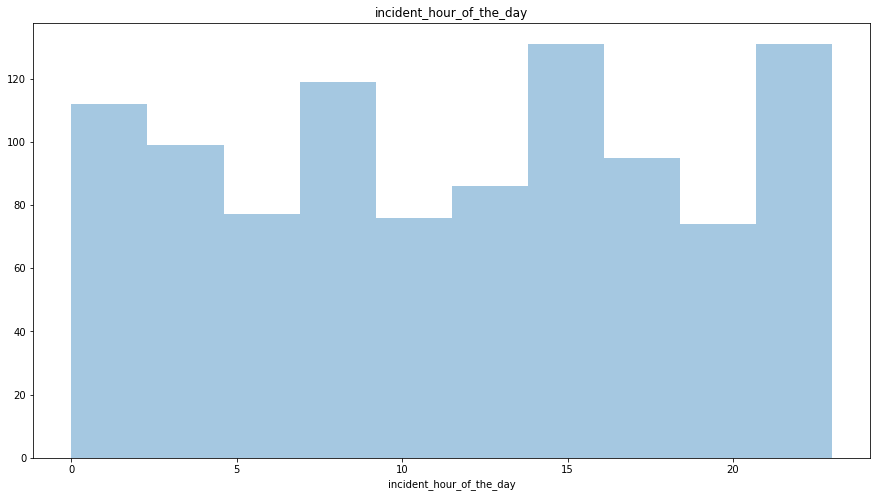

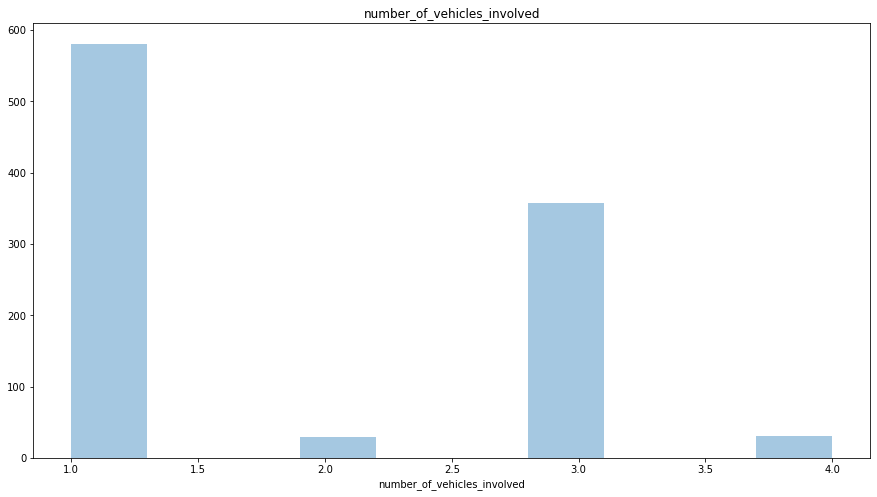

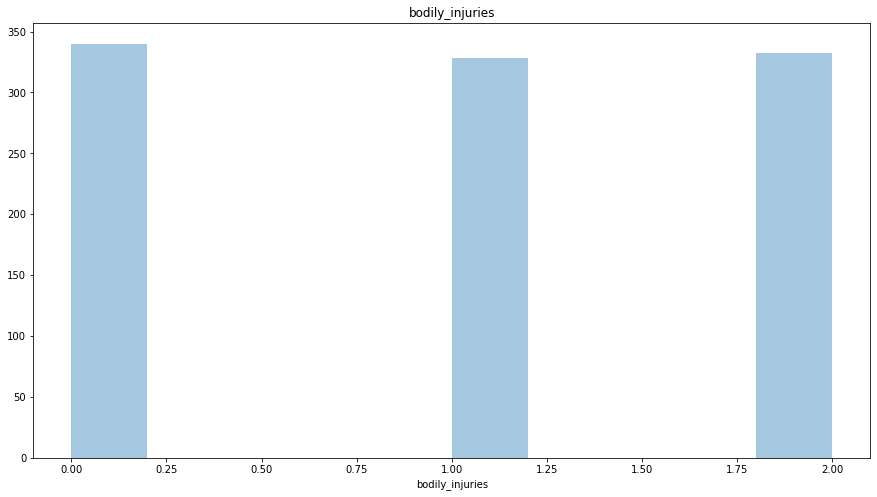

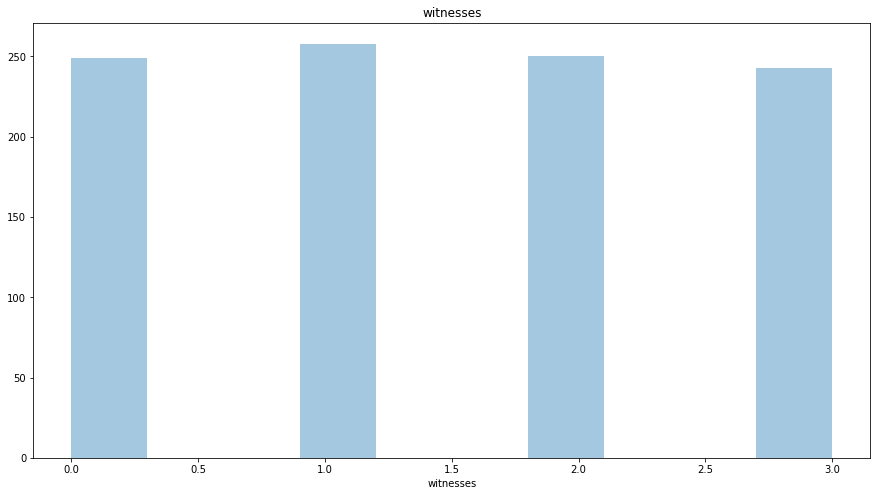

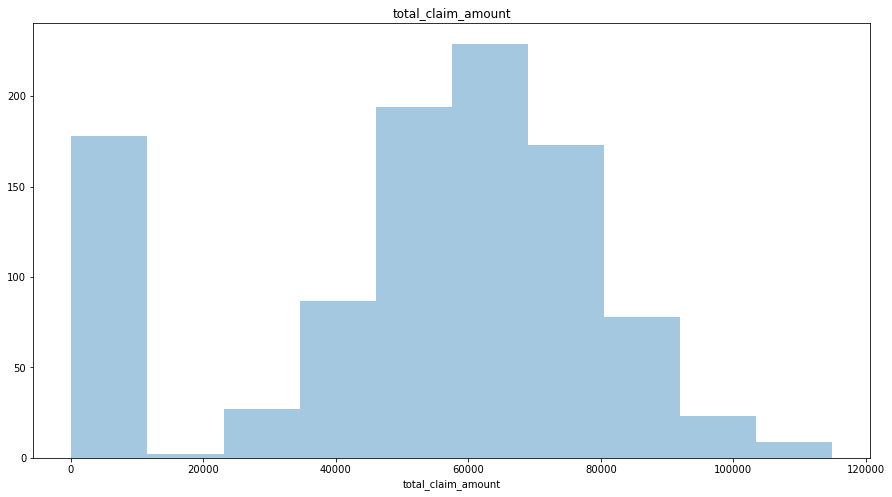

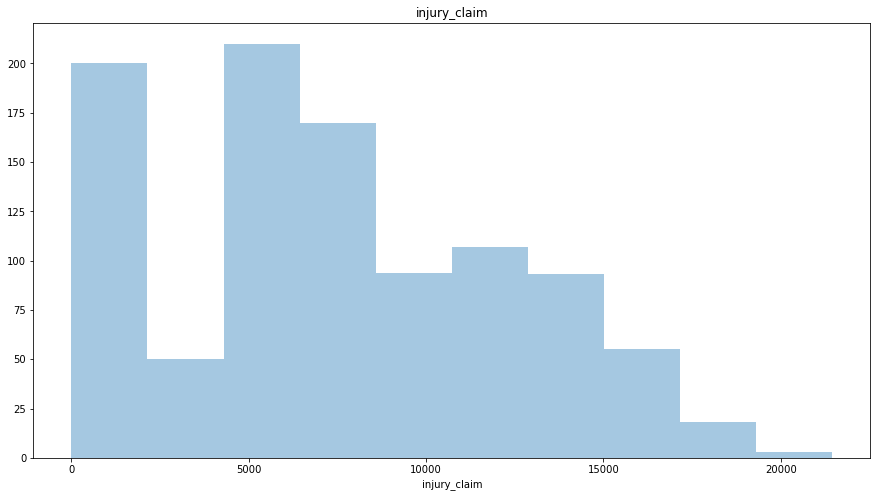

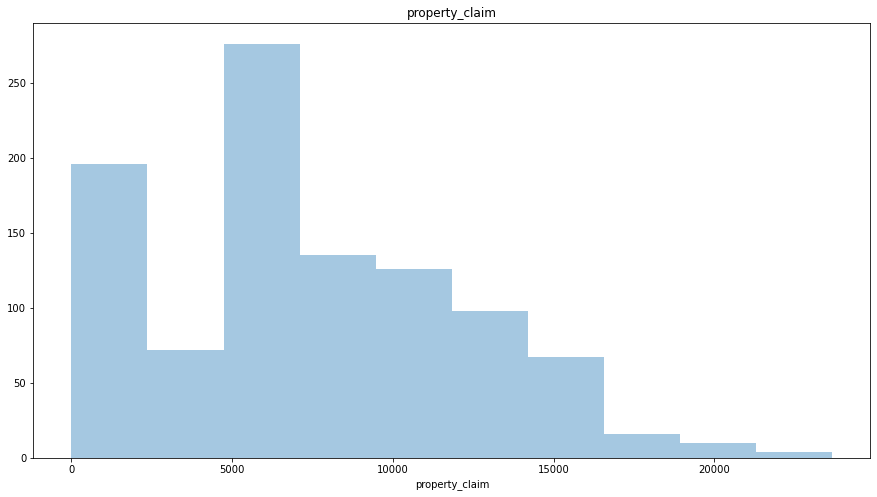

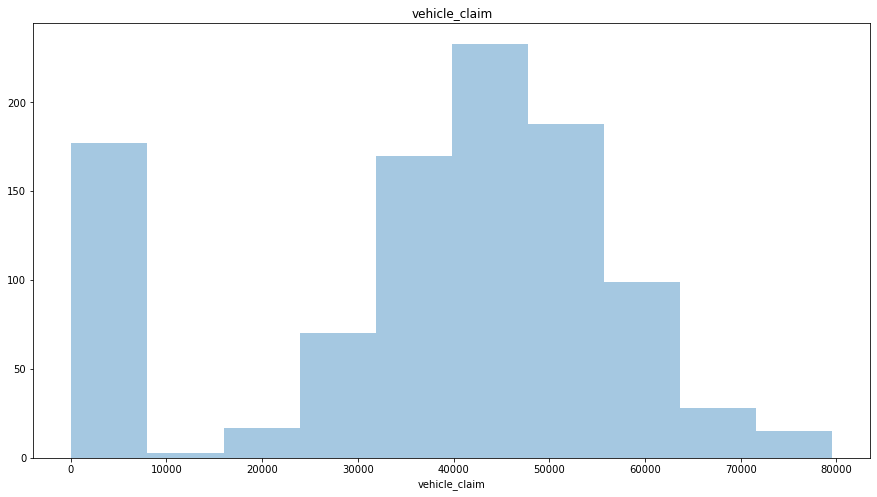

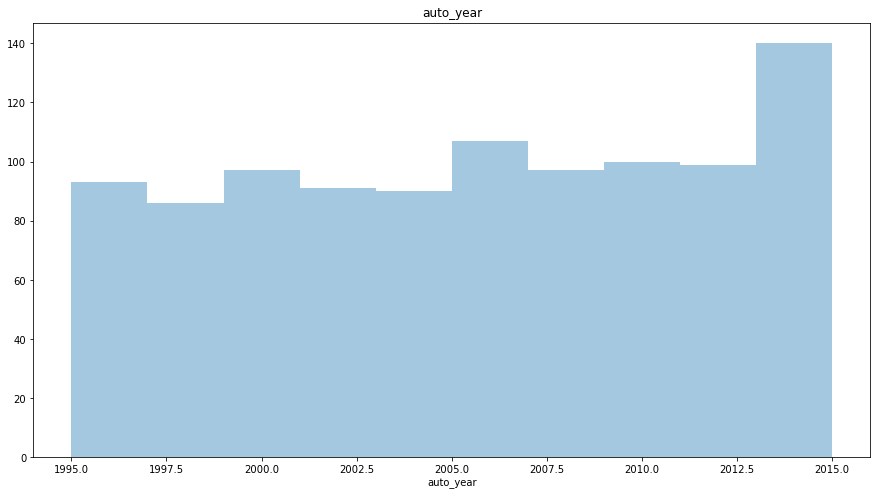

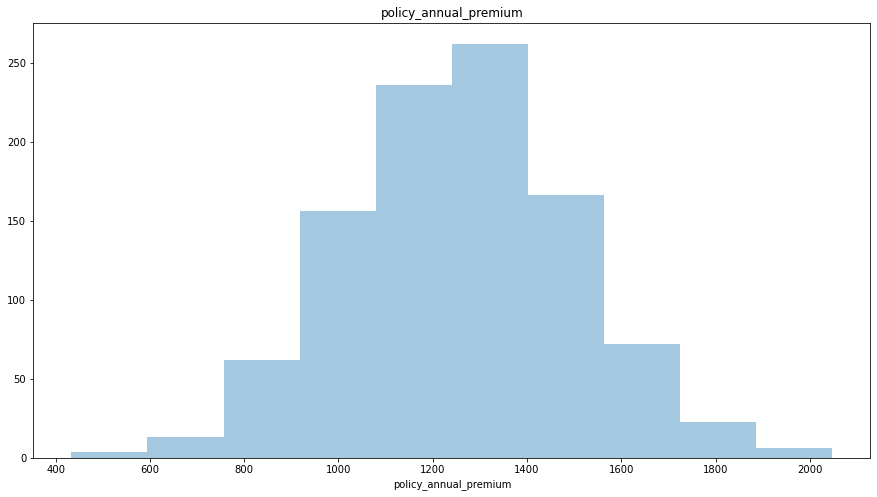

In [19]:
for i in df[cont_cols]:                                 #univariate analysis
    plt.figure(figsize = (15, 8))
    sns.distplot(df[i], bins = 10, kde = False)
    plt.title(i)
    plt.show()

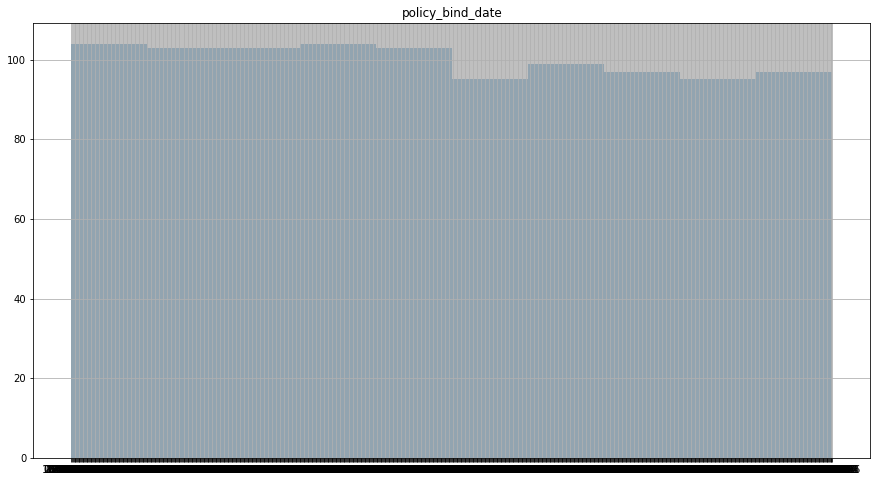

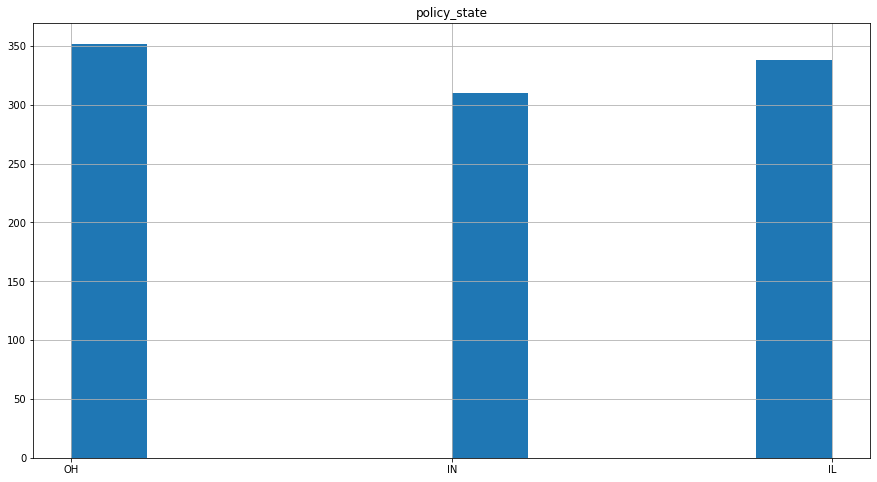

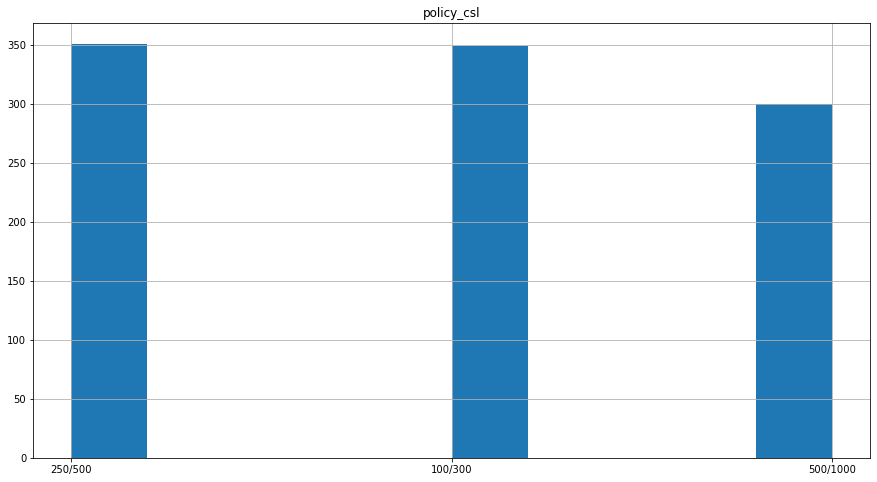

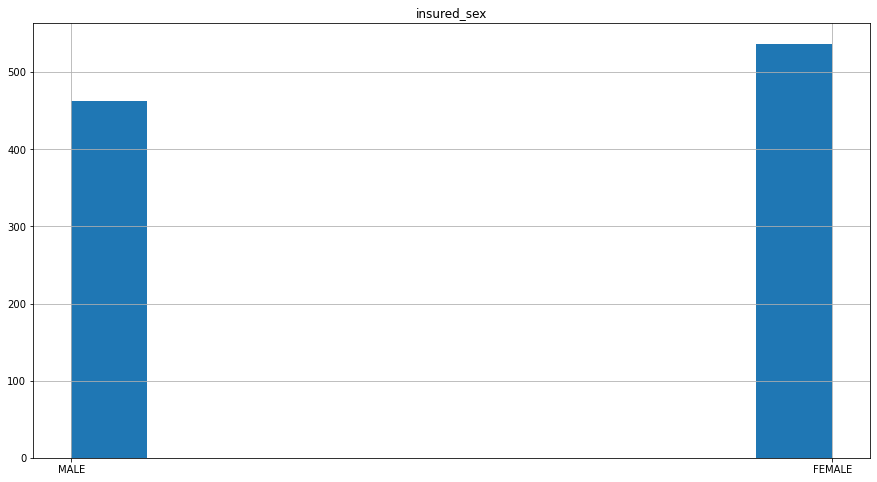

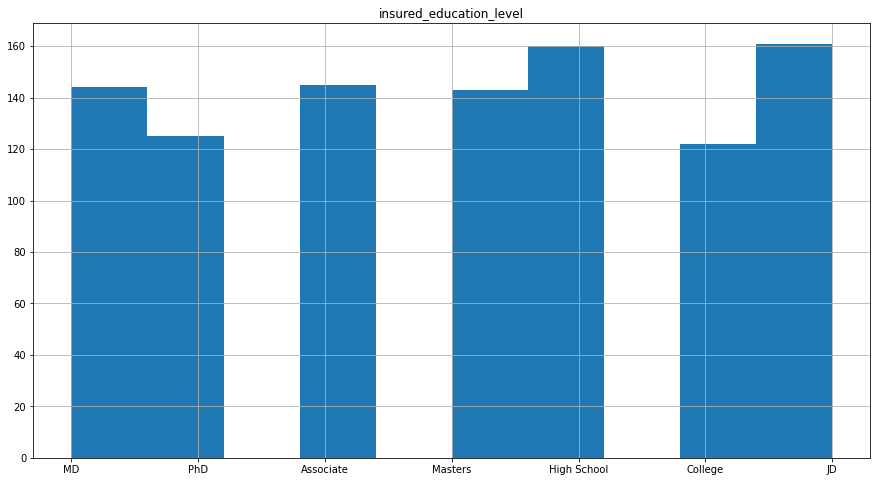

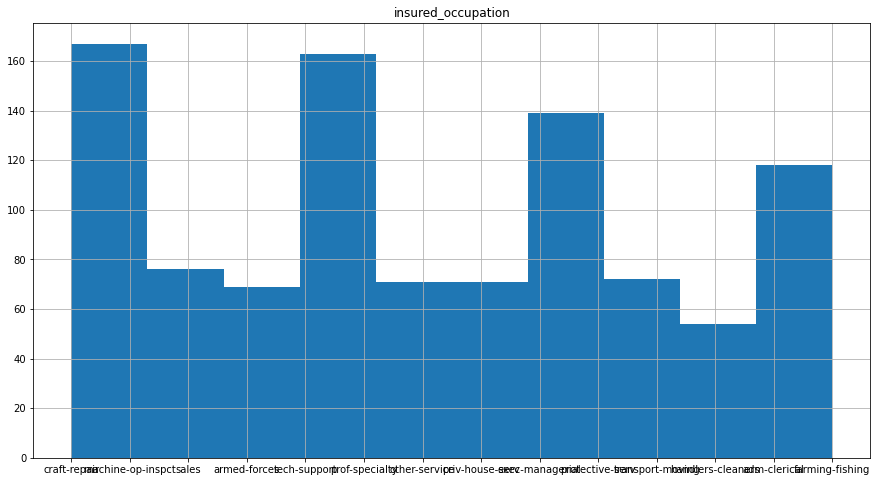

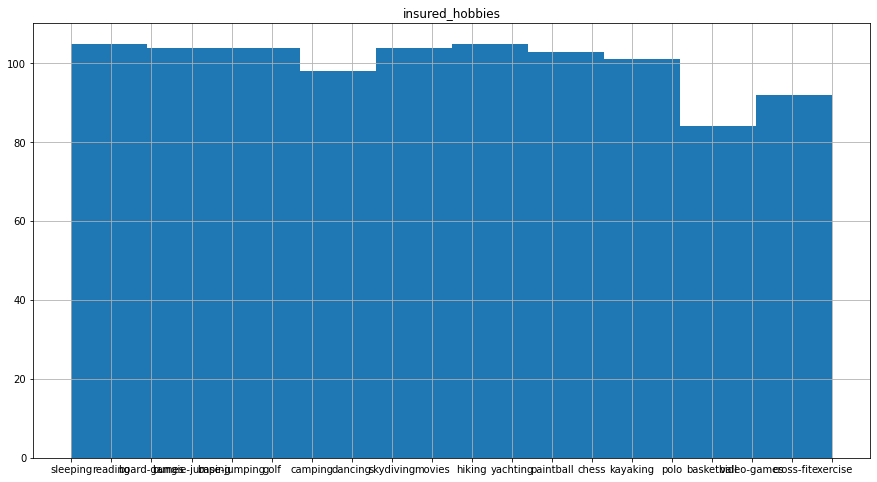

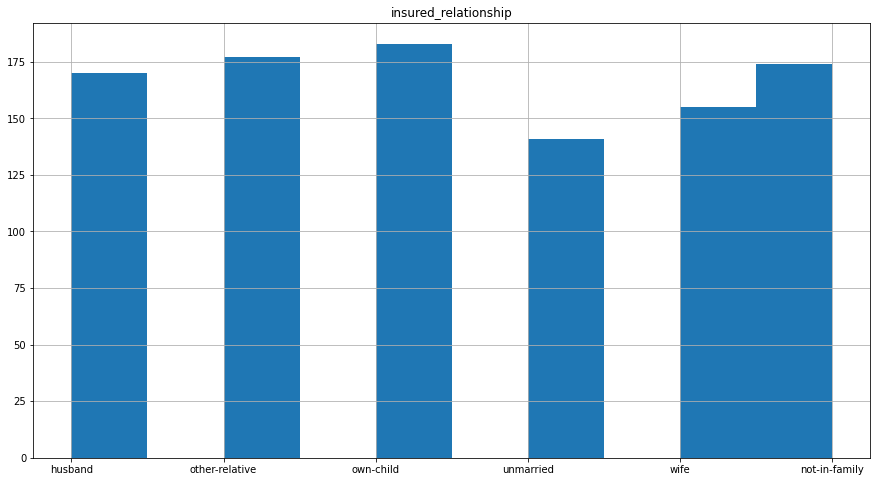

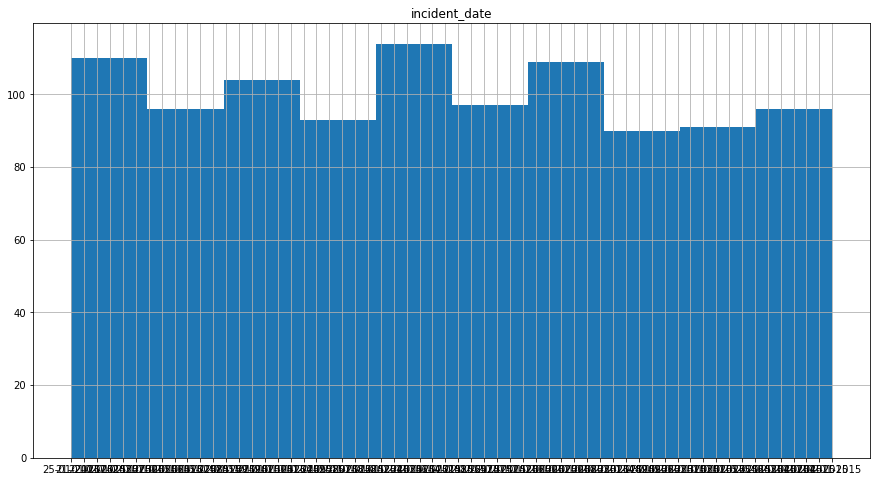

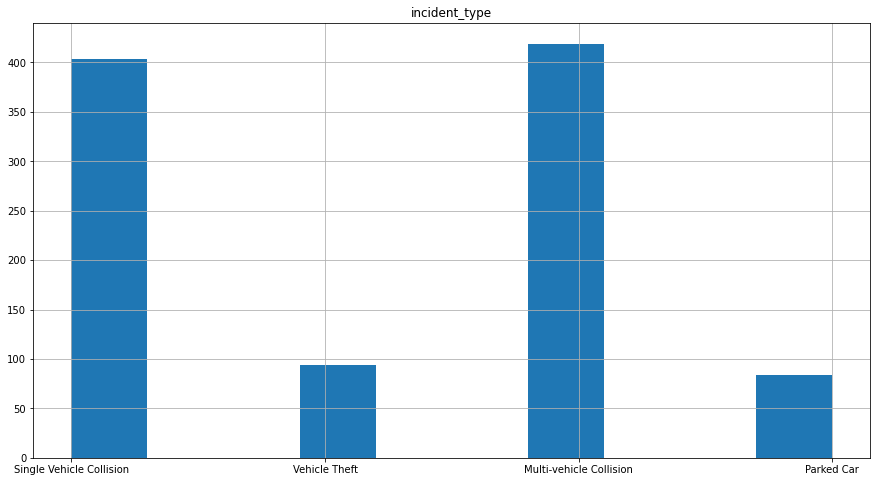

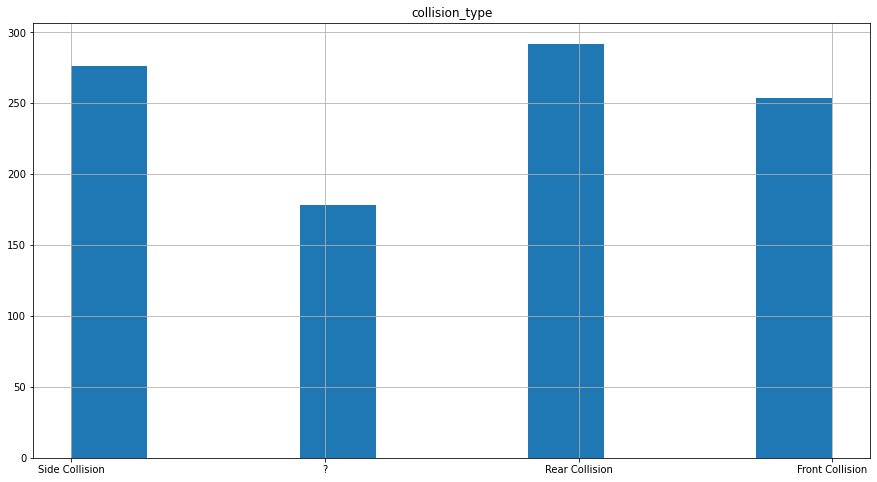

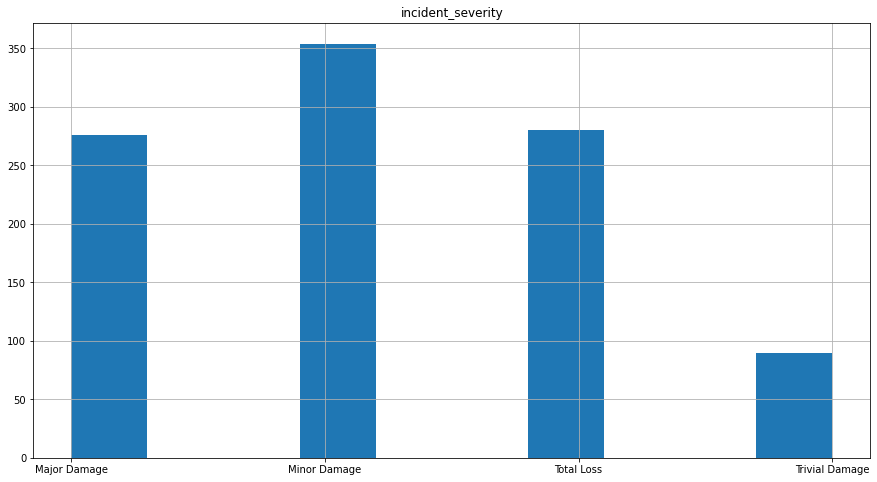

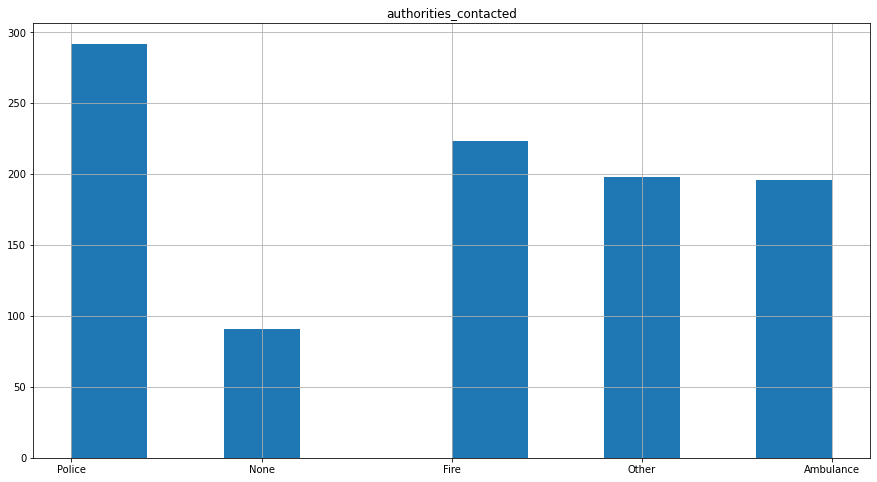

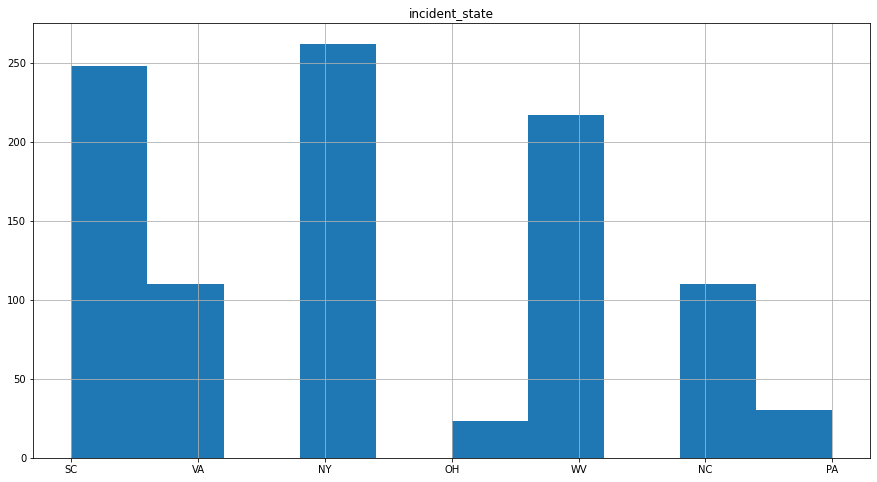

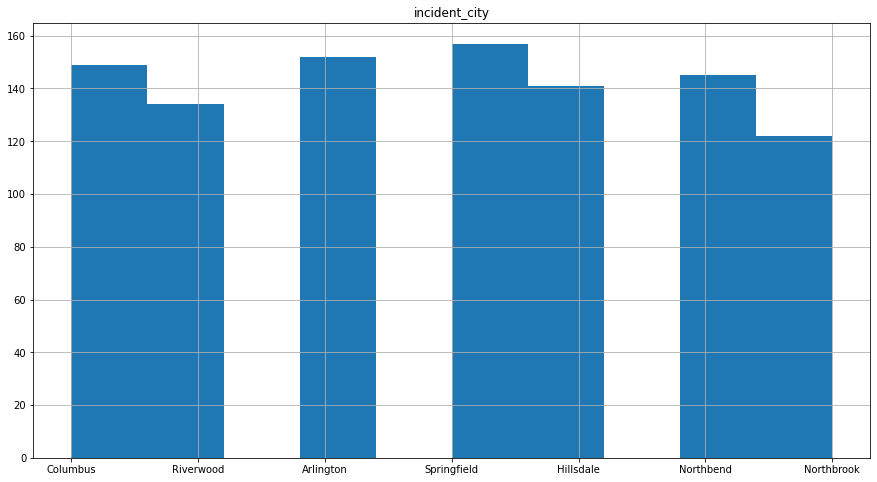

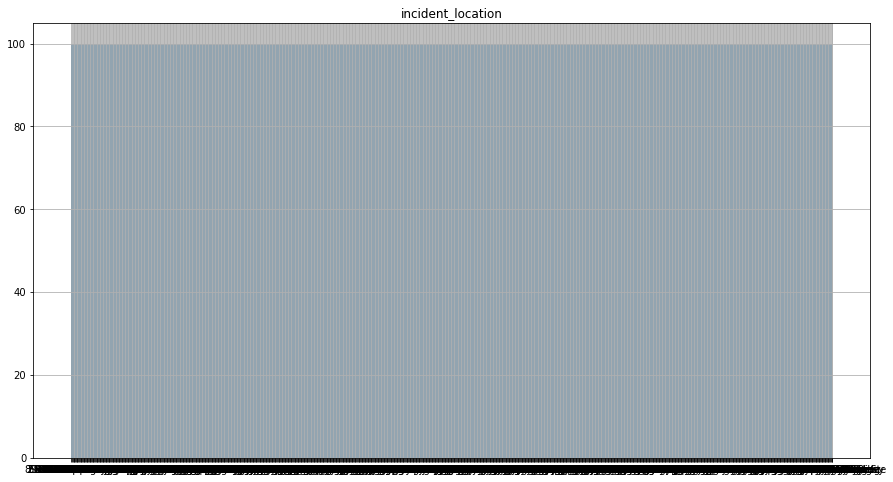

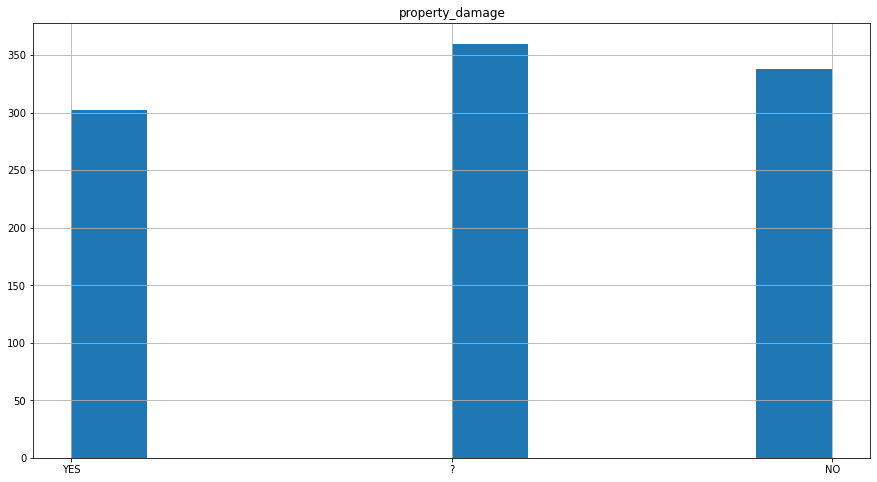

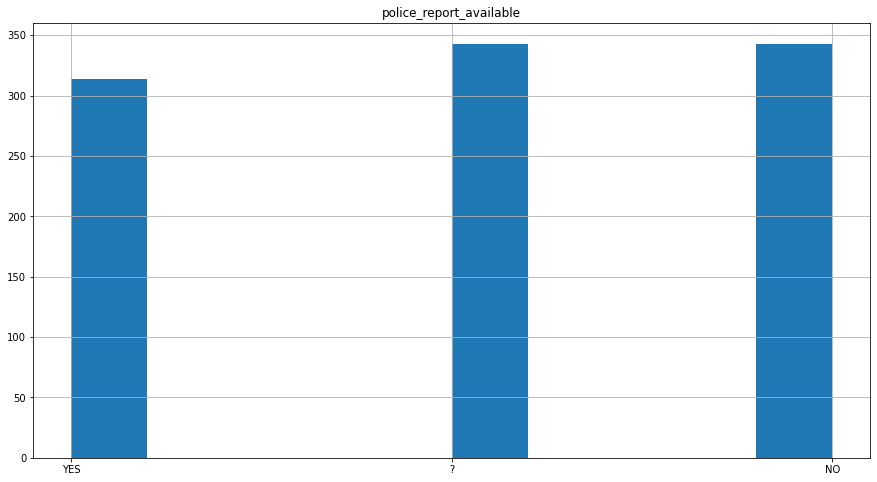

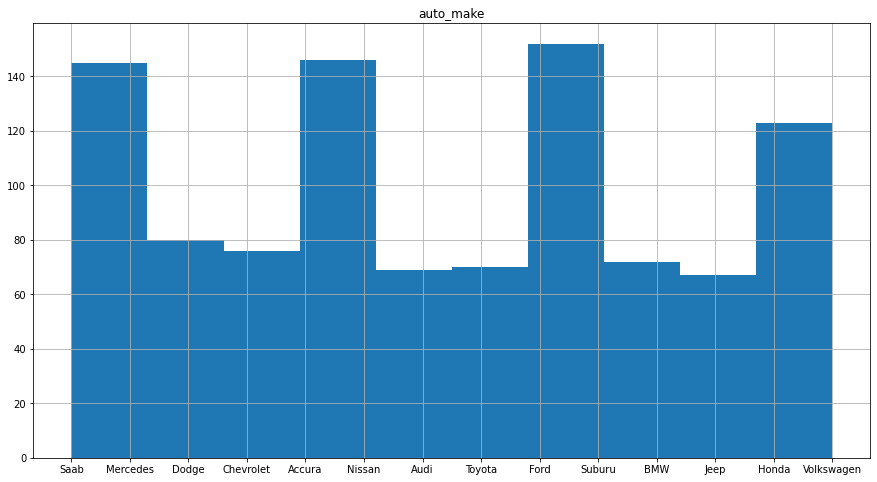

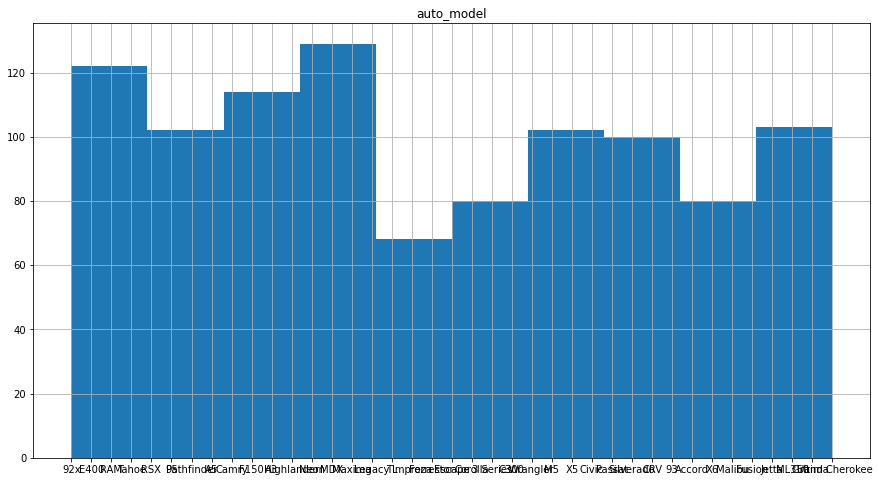

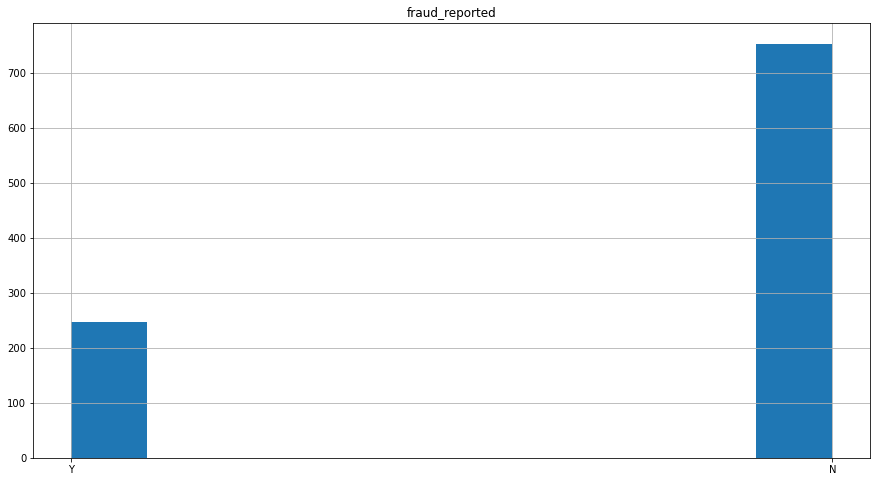

In [20]:
for i in cate_cols:                                 #univariate analysis
    plt.figure(figsize = (15, 8))
    df[i].hist(grid = True)
    plt.title(i)
    plt.show()

In [21]:
df.drop(['policy_bind_date', 'incident_date', 'incident_location'], axis = 1, inplace = True)

In [22]:
df.shape

(1000, 36)

In [23]:
cate_cols.remove('policy_bind_date')
cate_cols.remove('incident_date')
cate_cols.remove('incident_location')

In [24]:
df[cate_cols].head(10)

,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,property_damage,police_report_available,auto_make,auto_model,fraud_reported
0,OH,250/500,MALE,MD,craft-repair,sleeping,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,YES,YES,Saab,92x,Y
1,IN,250/500,MALE,MD,machine-op-inspct,reading,other-relative,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,?,?,Mercedes,E400,Y
2,OH,100/300,FEMALE,PhD,sales,board-games,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,NO,NO,Dodge,RAM,N
3,IL,250/500,FEMALE,PhD,armed-forces,board-games,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,?,NO,Chevrolet,Tahoe,Y
4,IL,500/1000,MALE,Associate,sales,board-games,unmarried,Vehicle Theft,?,Minor Damage,None,NY,Arlington,NO,NO,Accura,RSX,N
5,OH,250/500,FEMALE,PhD,tech-support,bungie-jumping,unmarried,Multi-vehicle Collision,Rear Collision,Major Damage,Fire,SC,Arlington,NO,NO,Saab,95,Y
6,IN,250/500,MALE,PhD,prof-specialty,board-games,husband,Multi-vehicle Collision,Front Collision,Minor Damage,Police,NY,Springfield,?,?,Nissan,Pathfinder,N
7,IL,100/300,MALE,Associate,tech-support,base-jumping,unmarried,Multi-vehicle Collision,Front Collision,Total Loss,Police,VA,Columbus,?,YES,Audi,A5,N
8,IL,100/300,FEMALE,PhD,other-service,golf,own-child,Single Vehicle Collision,Front Collision,Total Loss,Police,WV,Arlington,NO,YES,Toyota,Camry,N
9,IL,100/300,MALE,PhD,priv-house-serv,camping,wife,Single Vehicle Collision,Rear Collision,Total Loss,Other,NC,Hillsdale,NO,?,Saab,92x,N


In [25]:
df['collision_type'].replace('?', 'Unknown', inplace = True)
df['property_damage'].replace('?', 'Unknown', inplace = True)
df['police_report_available'].replace('?', 'Unknown', inplace = True)

Text(0.5, 1.0, 'Fraud reported  Percentage')

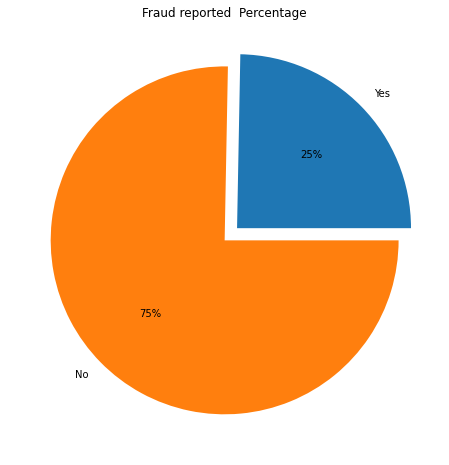

In [26]:
vals = [df.fraud_reported[df.fraud_reported == 'Y'].count() , df.fraud_reported[df.fraud_reported == 'N'].count()]
plt.figure(figsize = (15, 8))
label = ["Yes" , "No"]
plt.pie(vals , labels=label , autopct = '%1.0f%%' , explode=(0.1 , 0))
plt.title("Fraud reported  Percentage")

25% of the claims are fraud while 75% are not fraud.

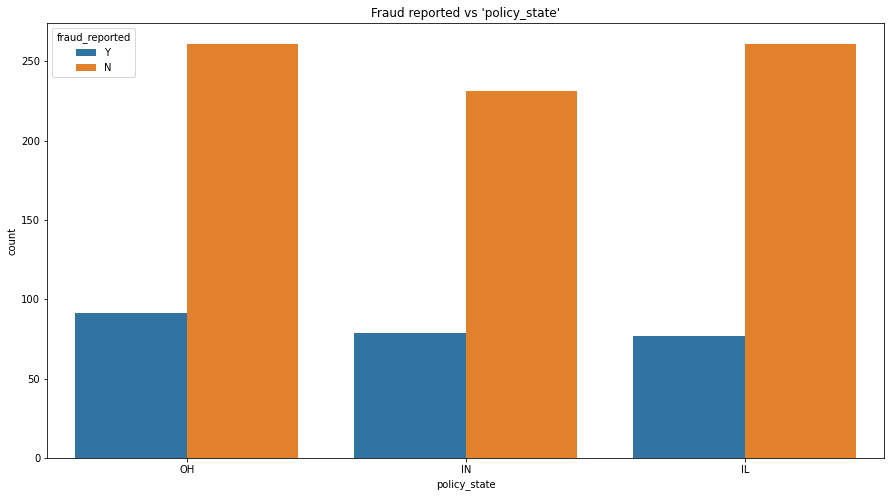

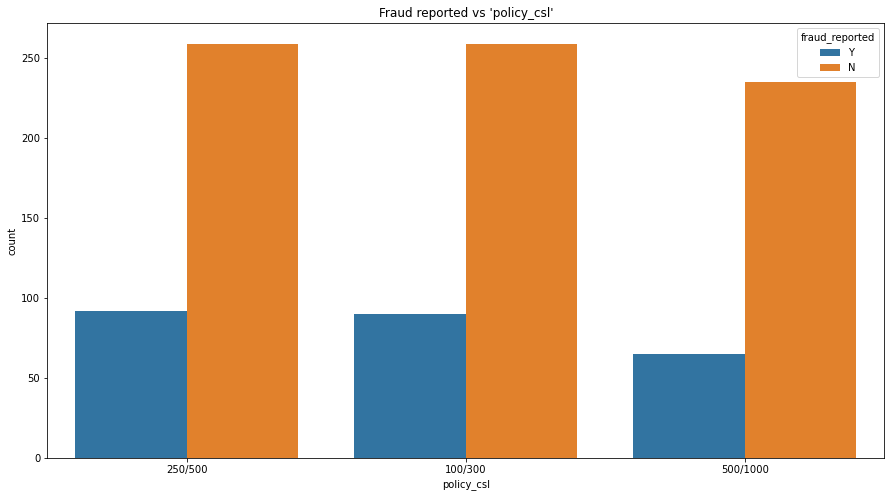

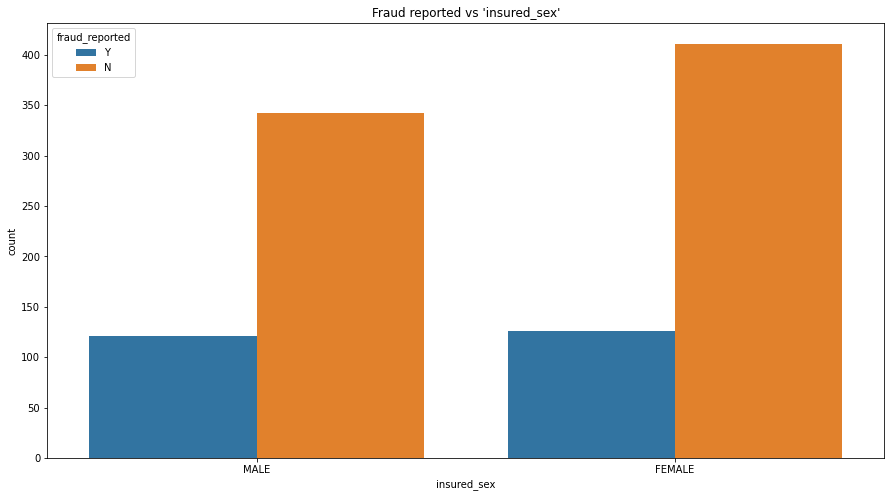

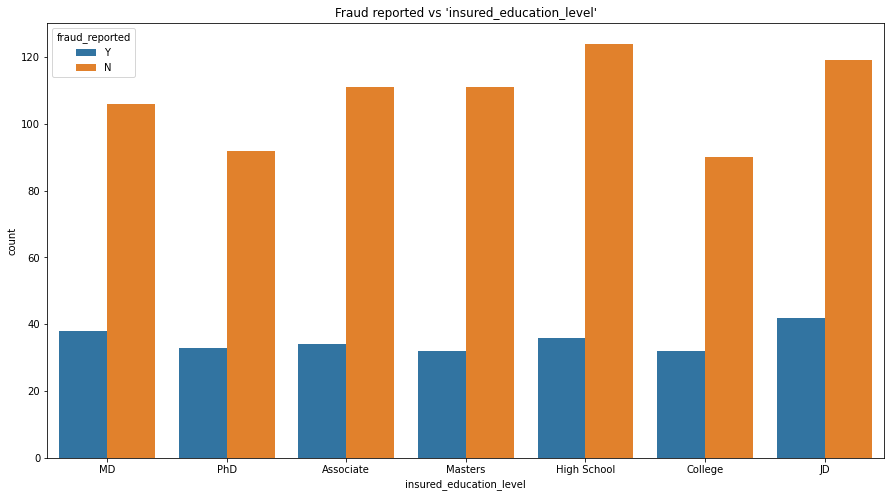

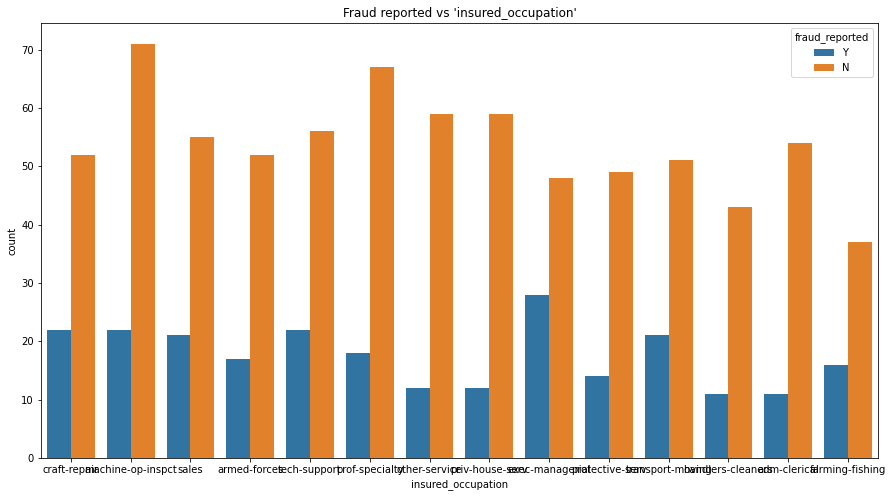

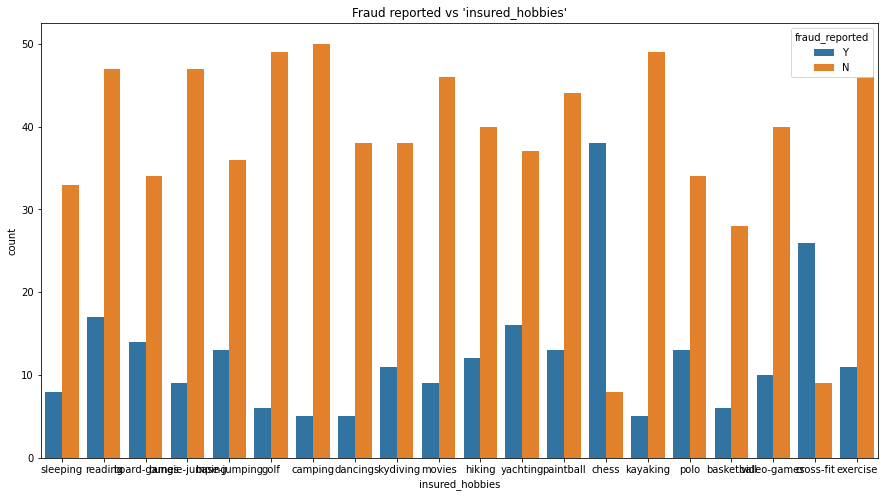

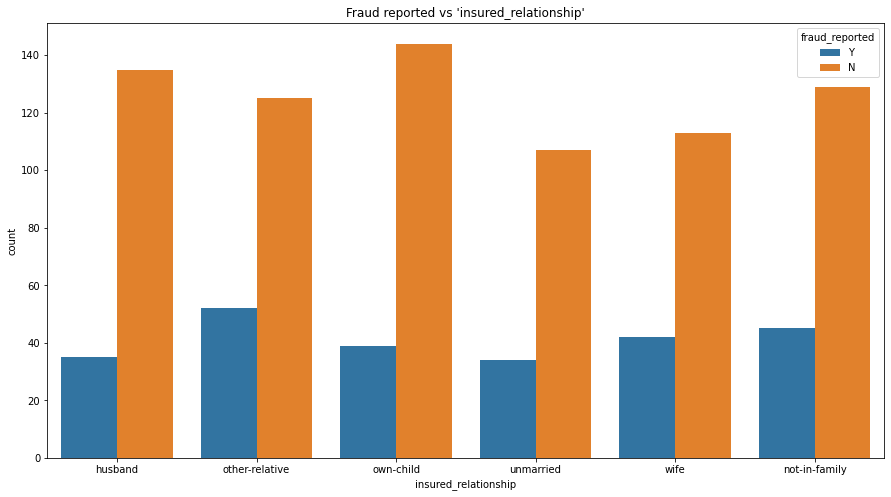

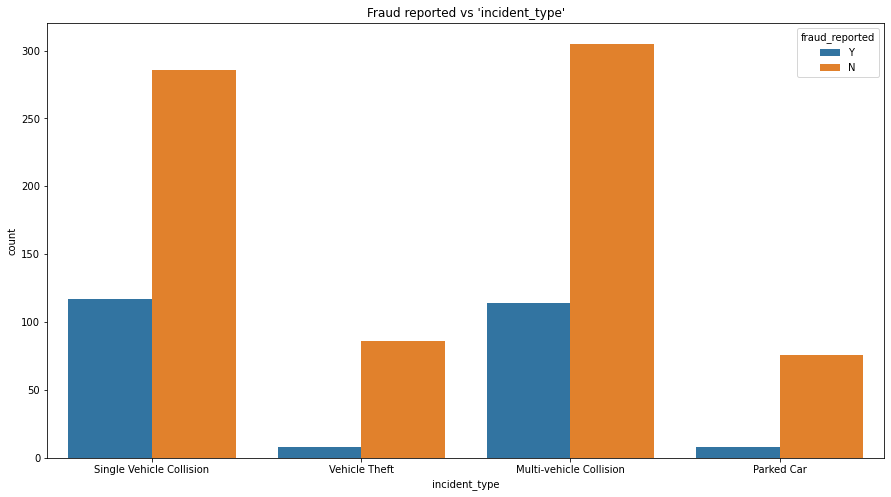

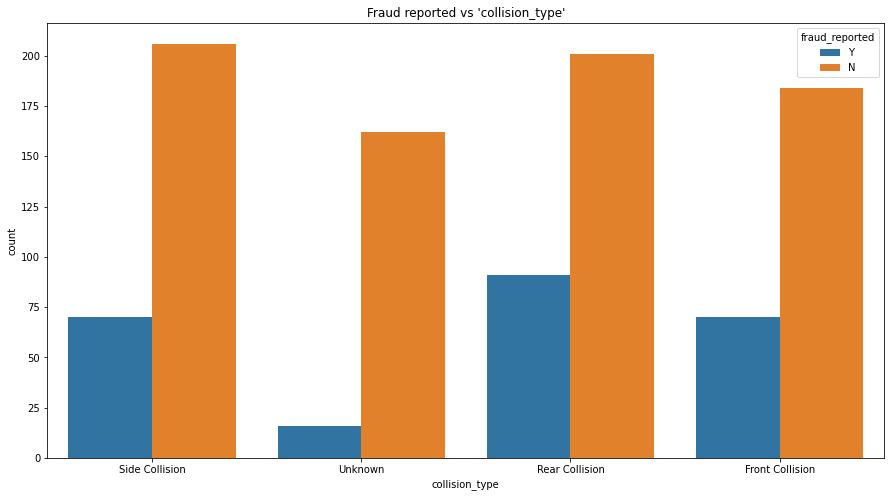

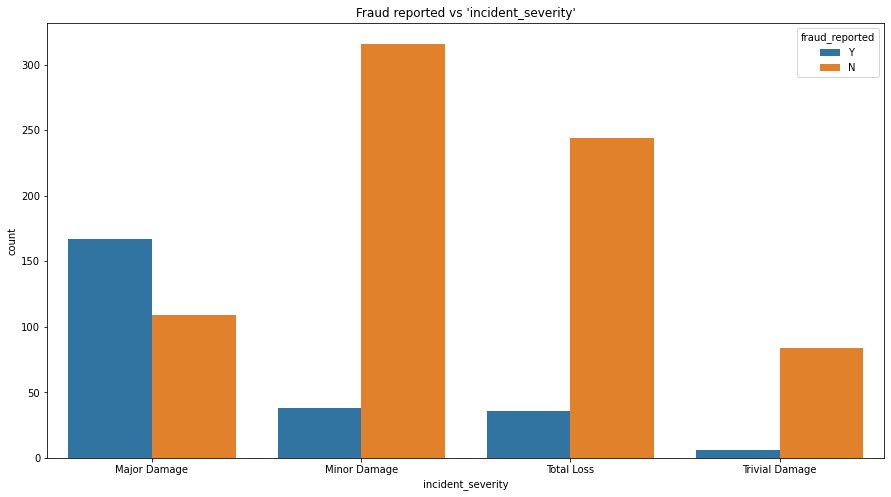

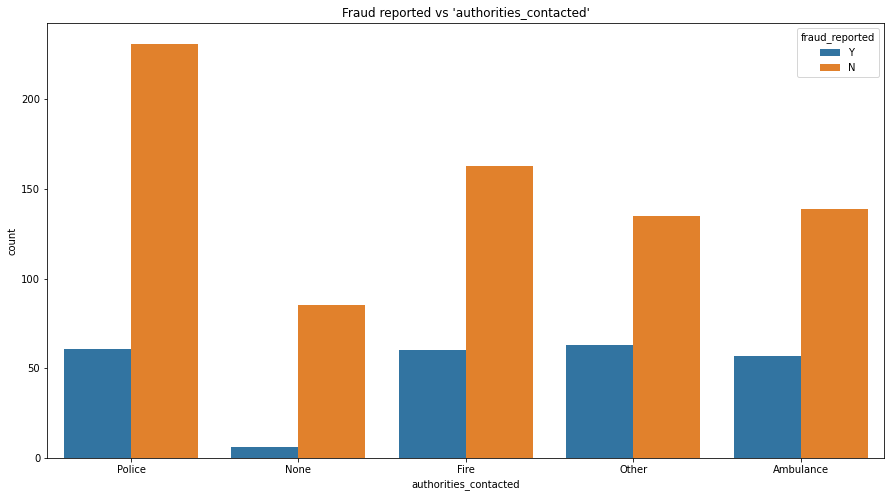

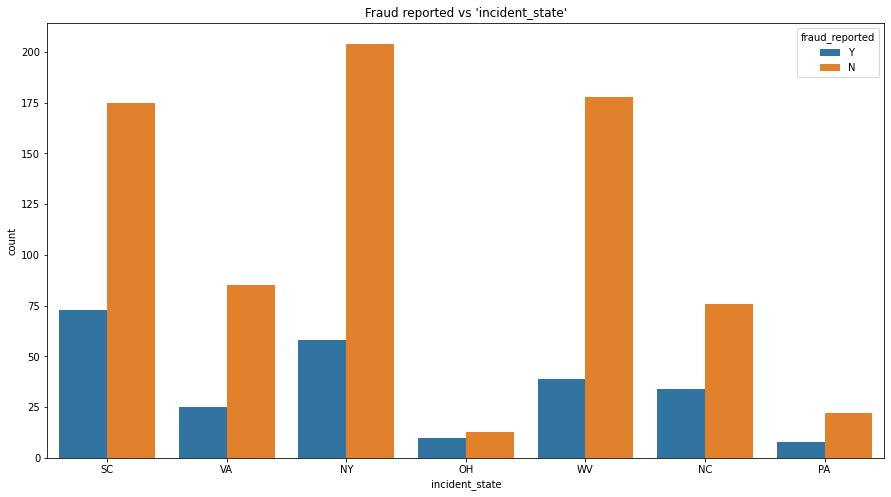

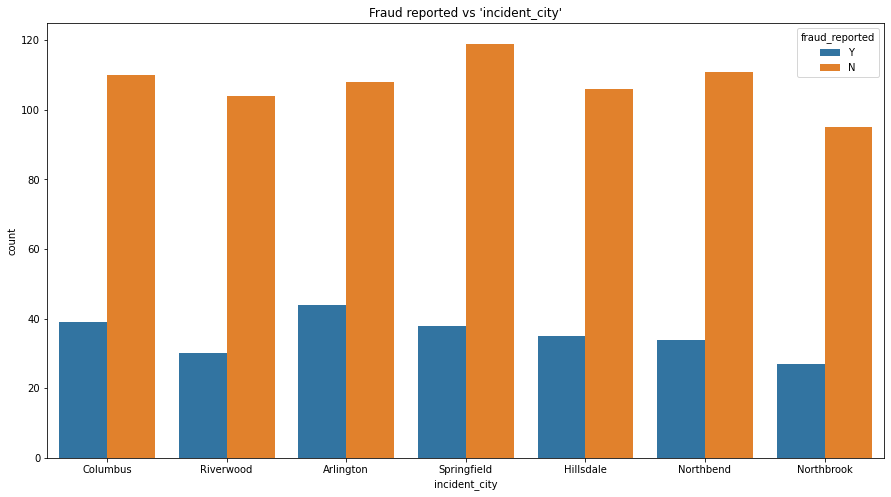

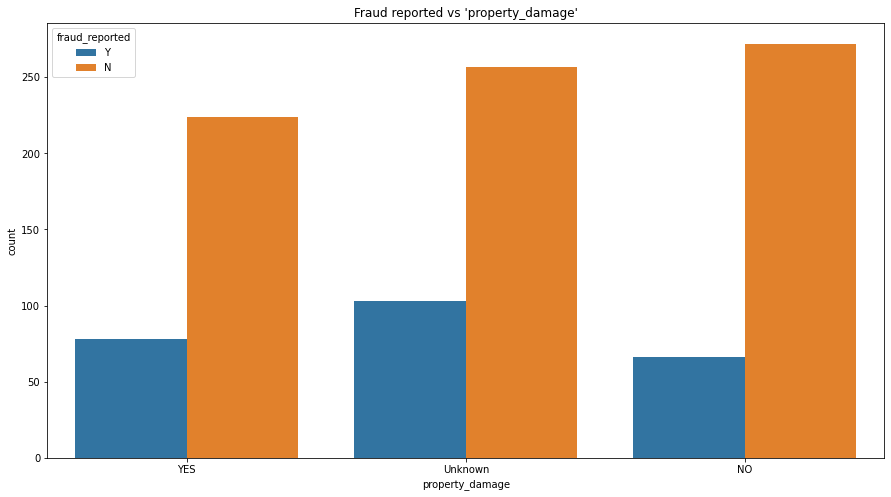

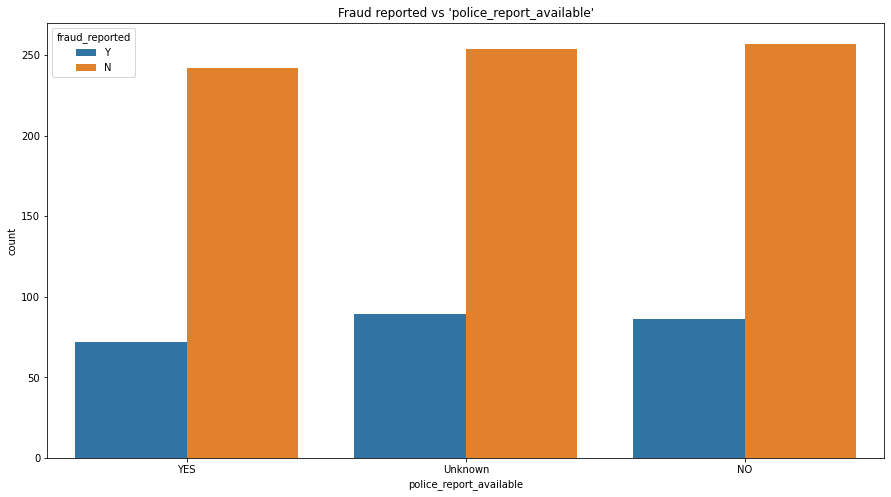

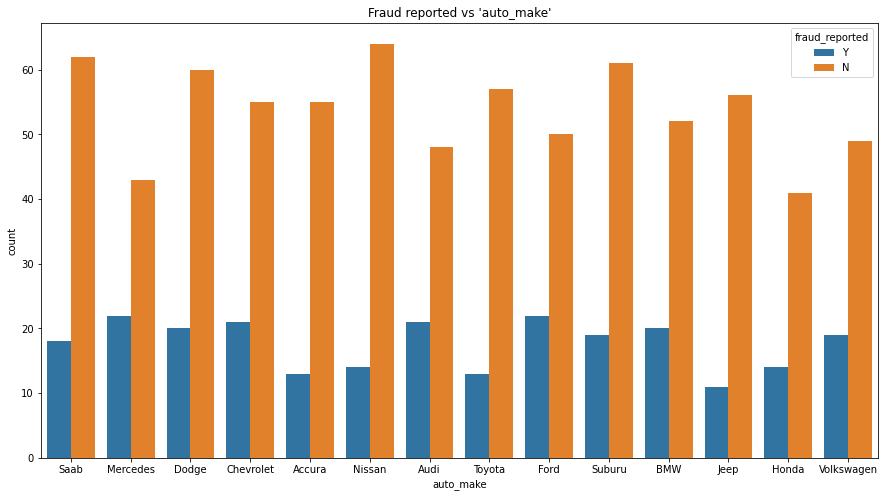

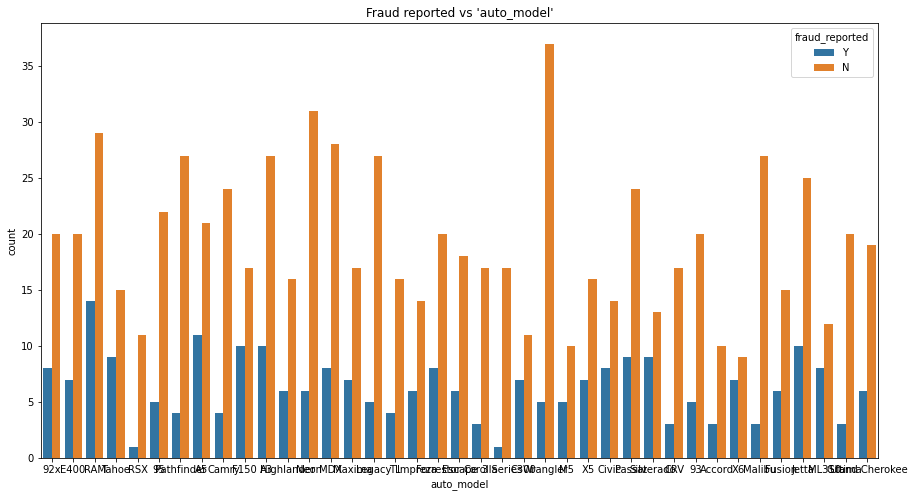

In [27]:
for i in cate_cols[:-1]:                                #bivariate analysis
    plt.figure(figsize=(15, 8))
    plt.title("Fraud reported vs '%s'"%i)
    sns.countplot(df[i],hue=df['fraud_reported'])

We can see that fraud is reported in alot of major damage cases. Apart from that other columns and bars have low fraud reported rate.

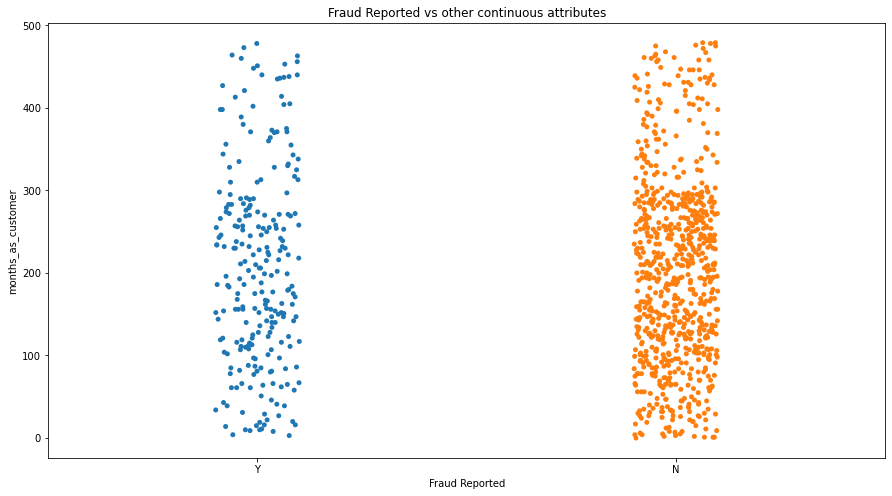

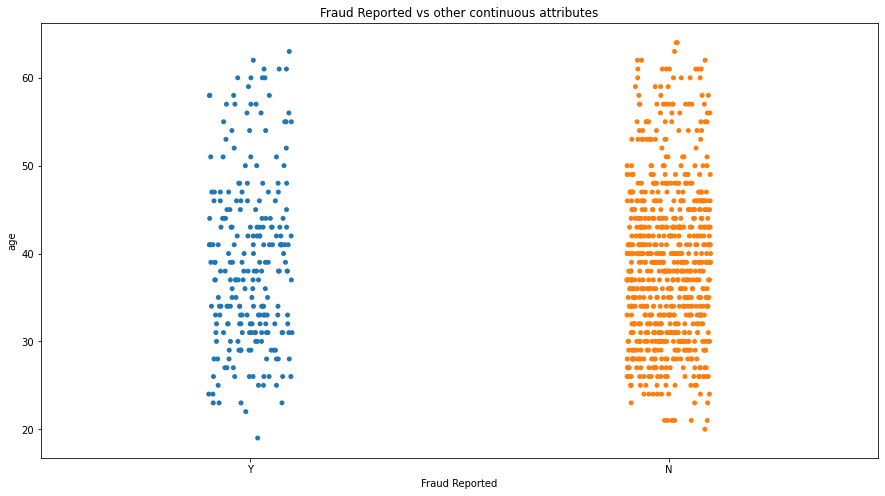

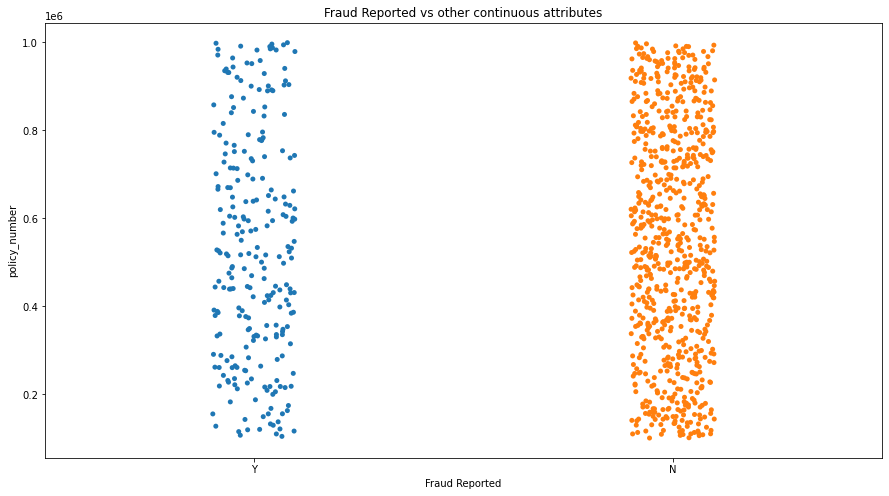

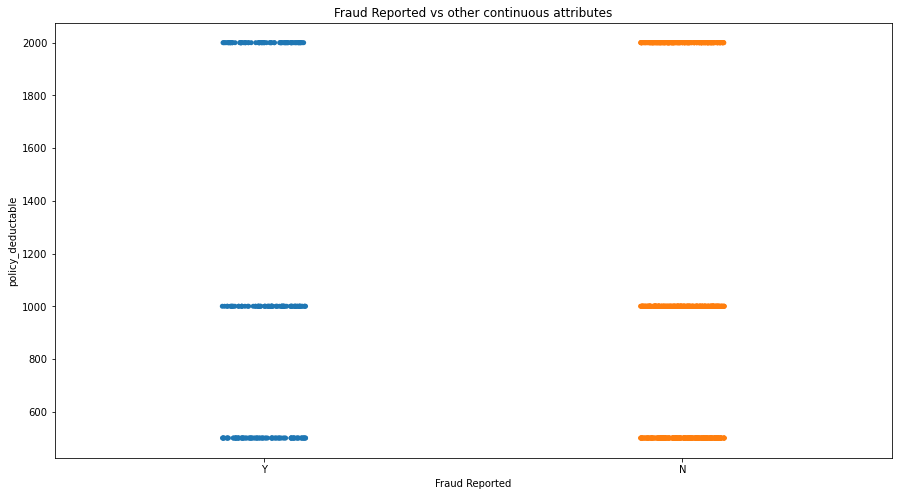

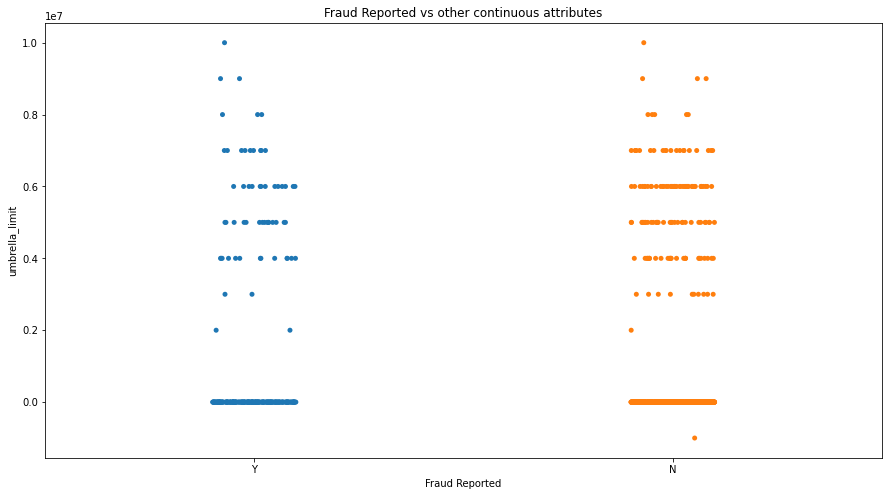

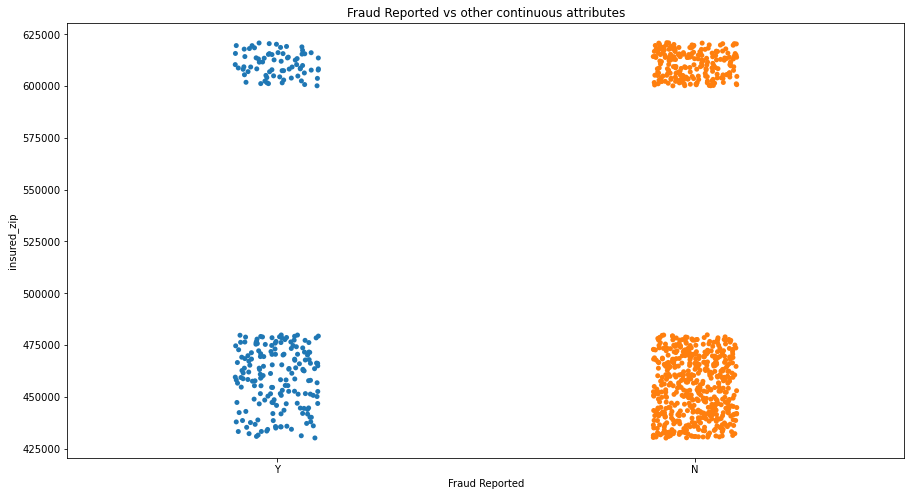

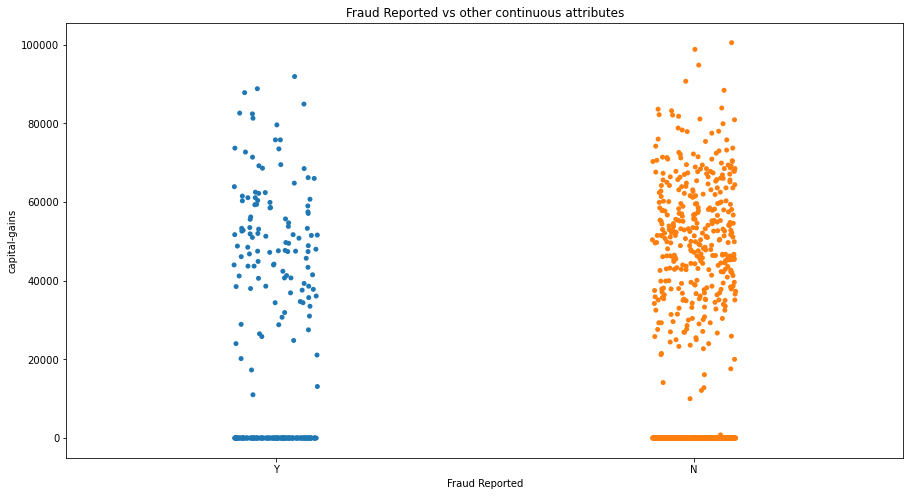

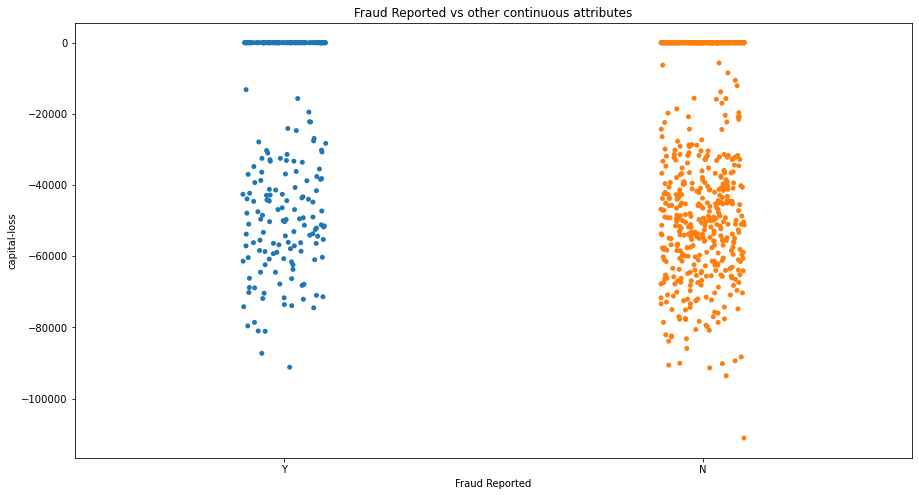

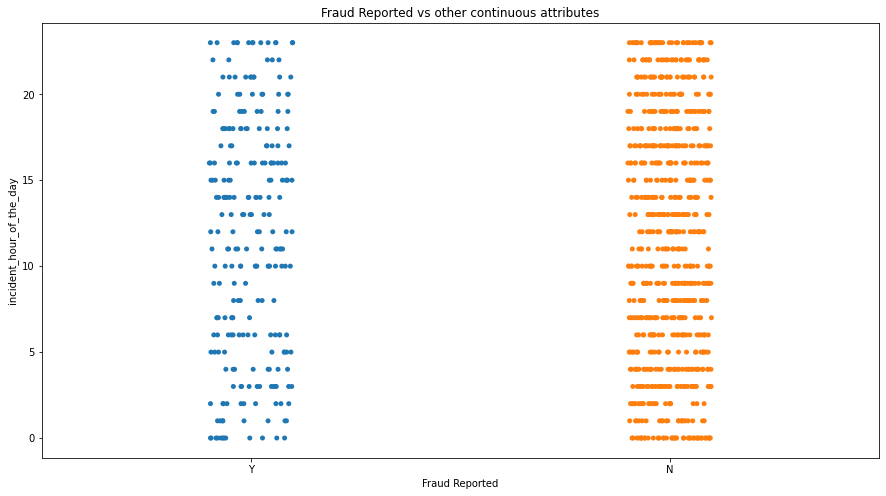

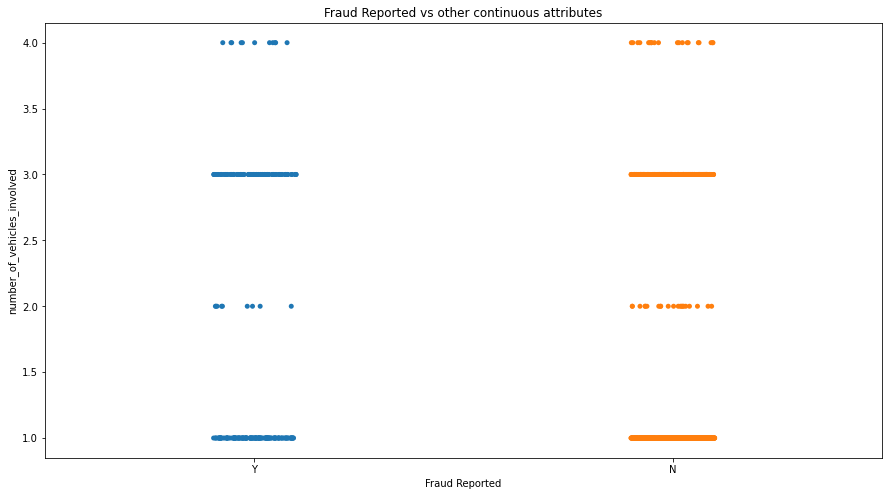

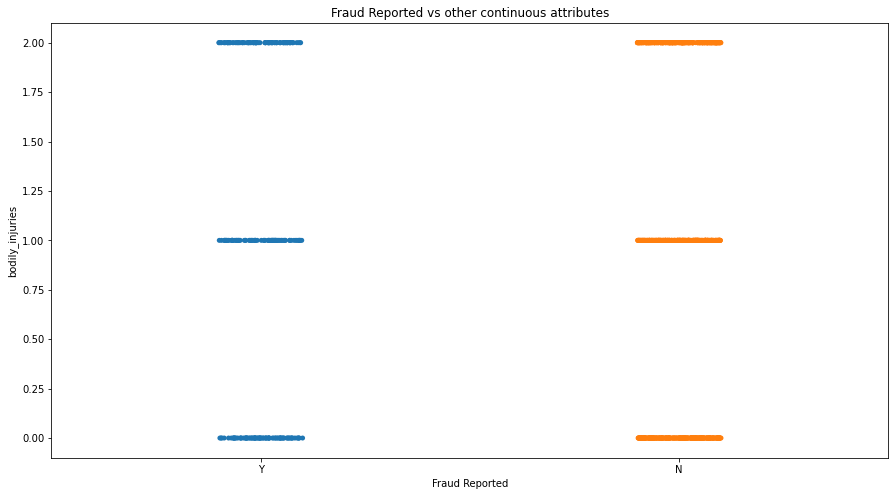

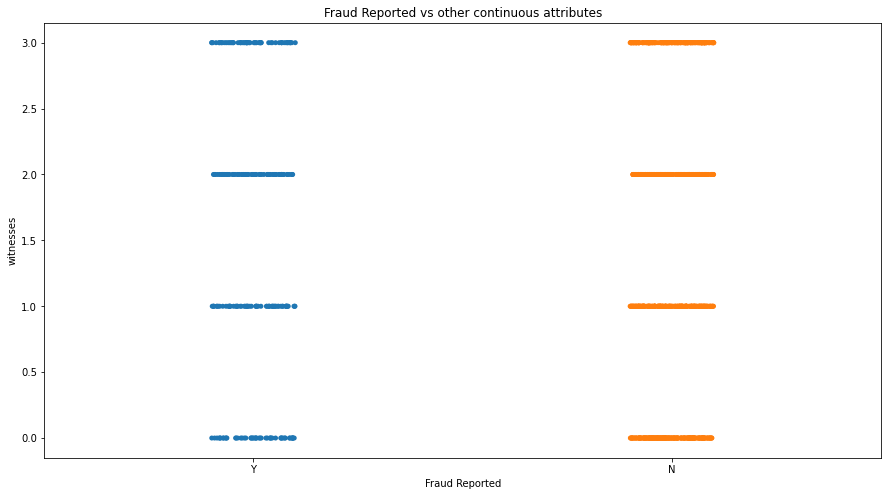

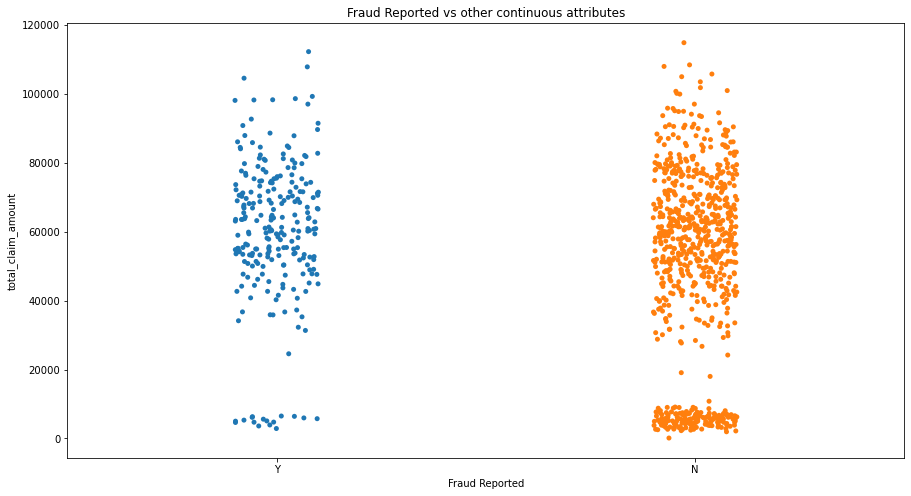

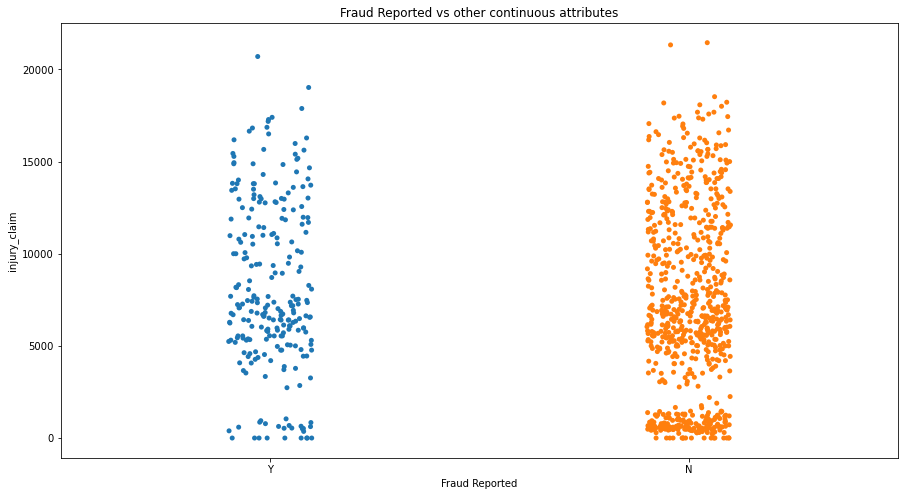

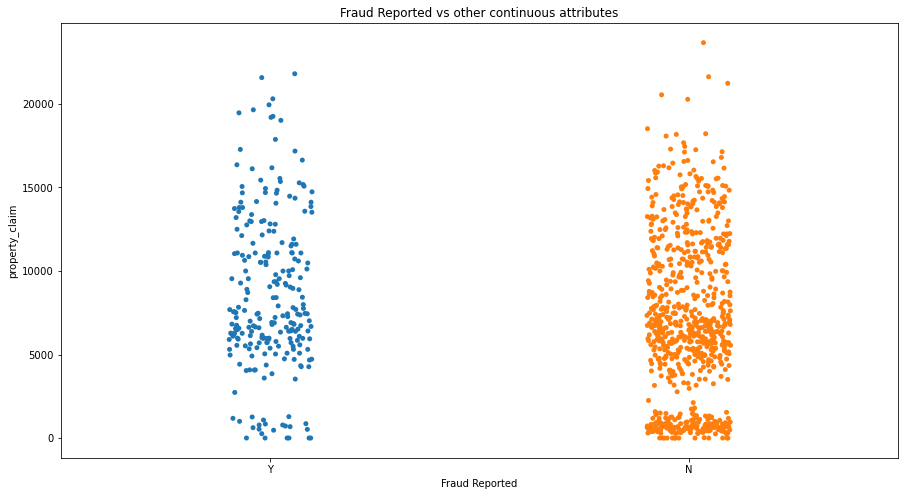

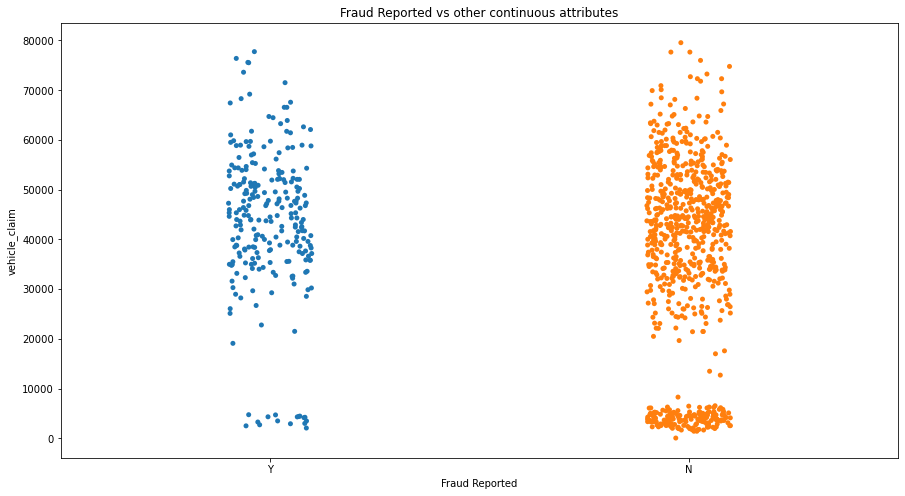

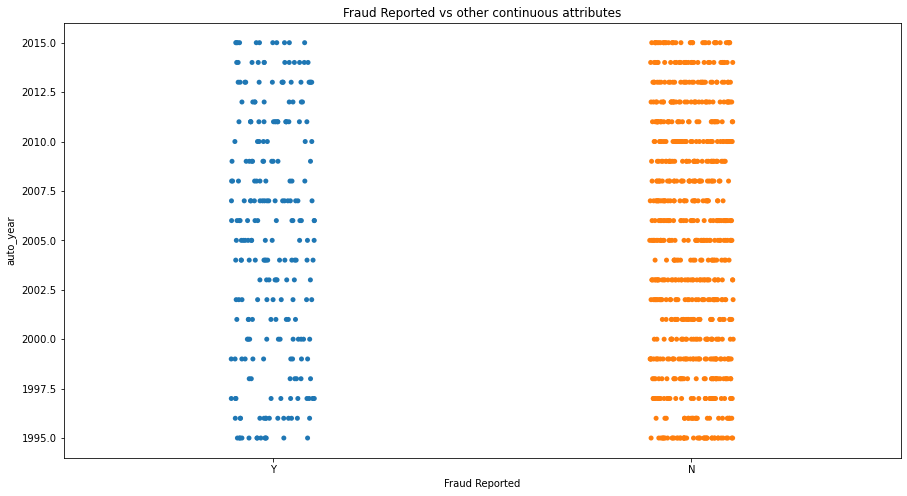

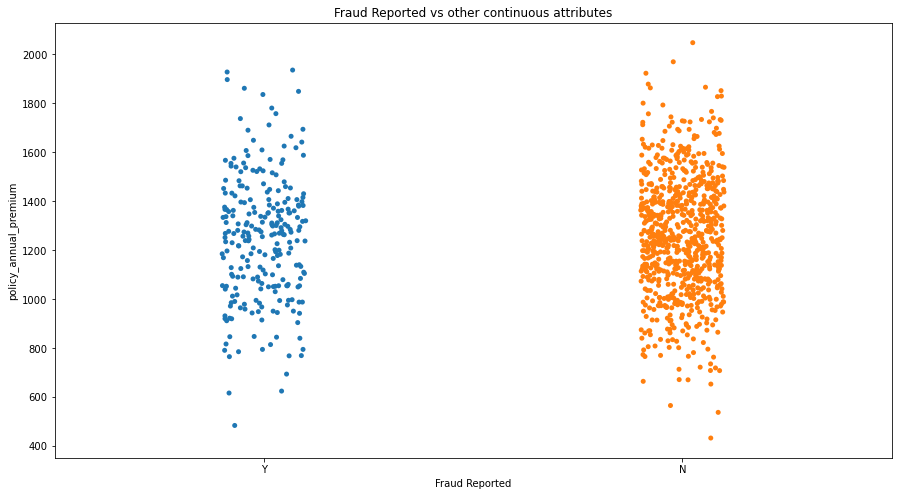

In [28]:
for i in cont_cols:                                          #bivariate analysis
    plt.figure(figsize = (15, 8))
    ax = sns.stripplot(df['fraud_reported'], df[i])
    ax.set(xlabel = 'Fraud Reported', ylabel = i)
    plt.title('Fraud Reported vs other continuous attributes')
    plt.show()

In [29]:
df['fraud_reported'].replace('N', 0, inplace = True)
df['fraud_reported'].replace('Y', 1, inplace = True)

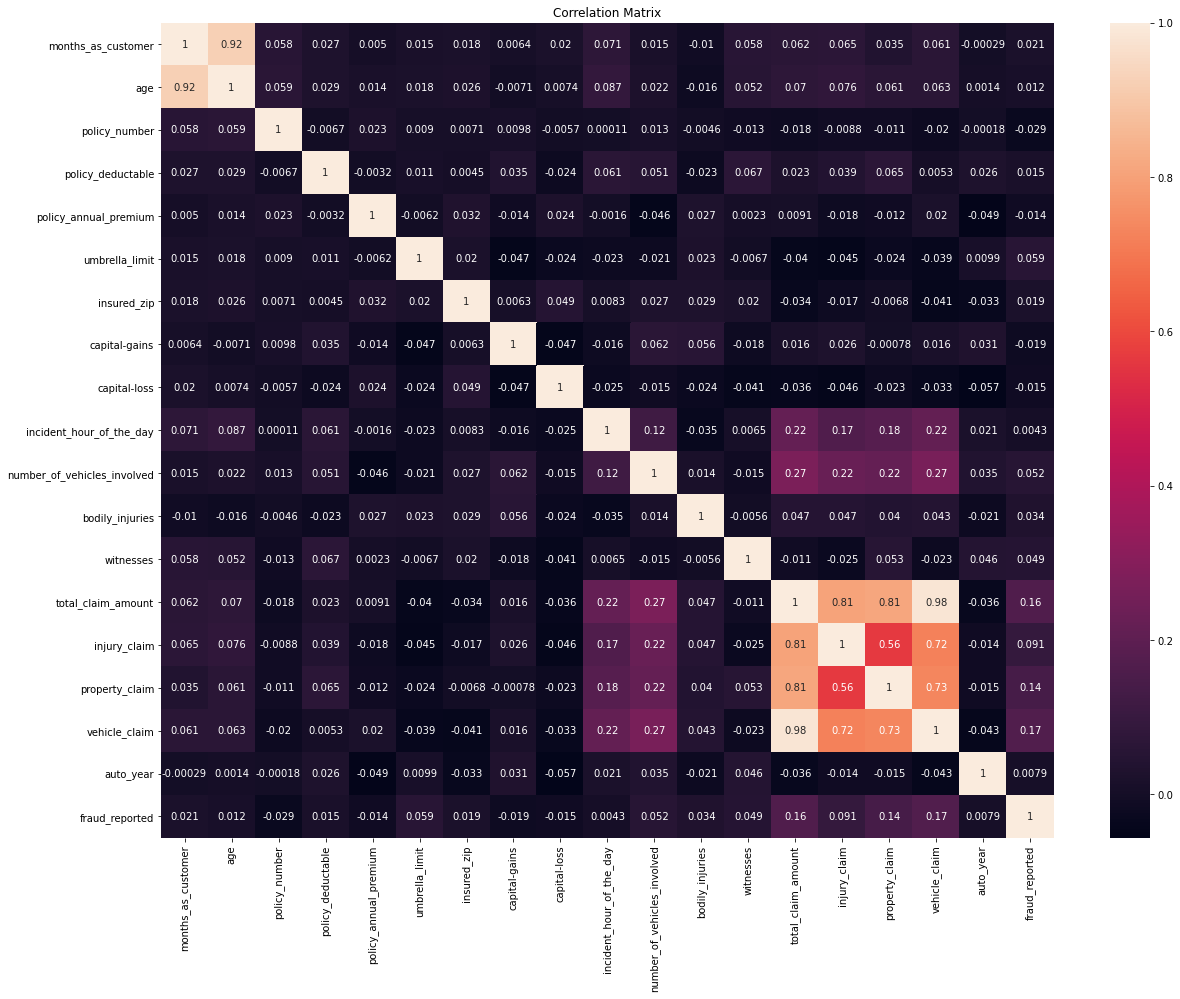

In [30]:
plt.figure(figsize = [20, 15])                             #multivariate analysis
sns.heatmap(df.corr(), annot = True)
plt.title('Correlation Matrix')
plt.show()

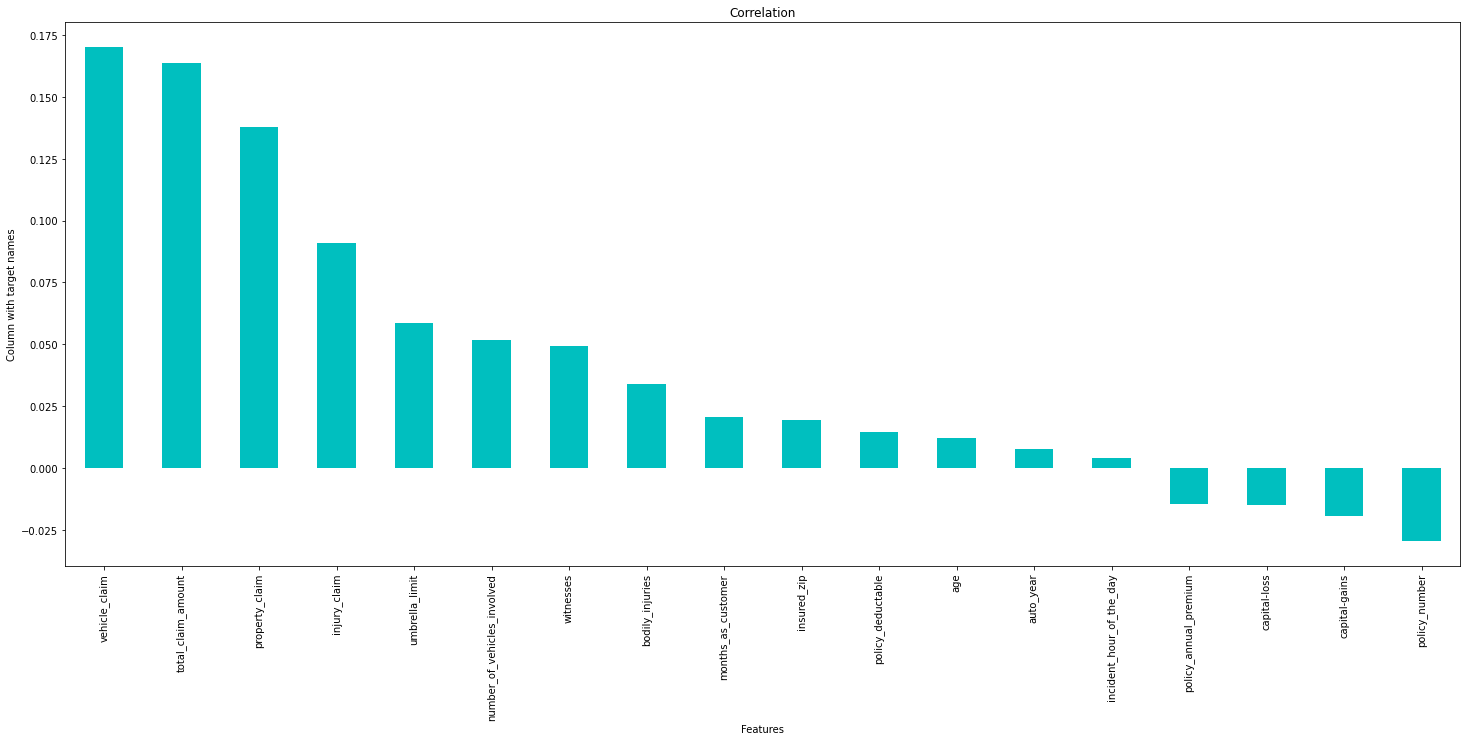

In [31]:
plt.figure(figsize = (25, 10))
df.corr()['fraud_reported'].sort_values(ascending = False).drop(['fraud_reported']).plot(kind = 'bar', color = 'c')
plt.xlabel('Features')
plt.ylabel('Column with target names')
plt.title('Correlation')
plt.show()

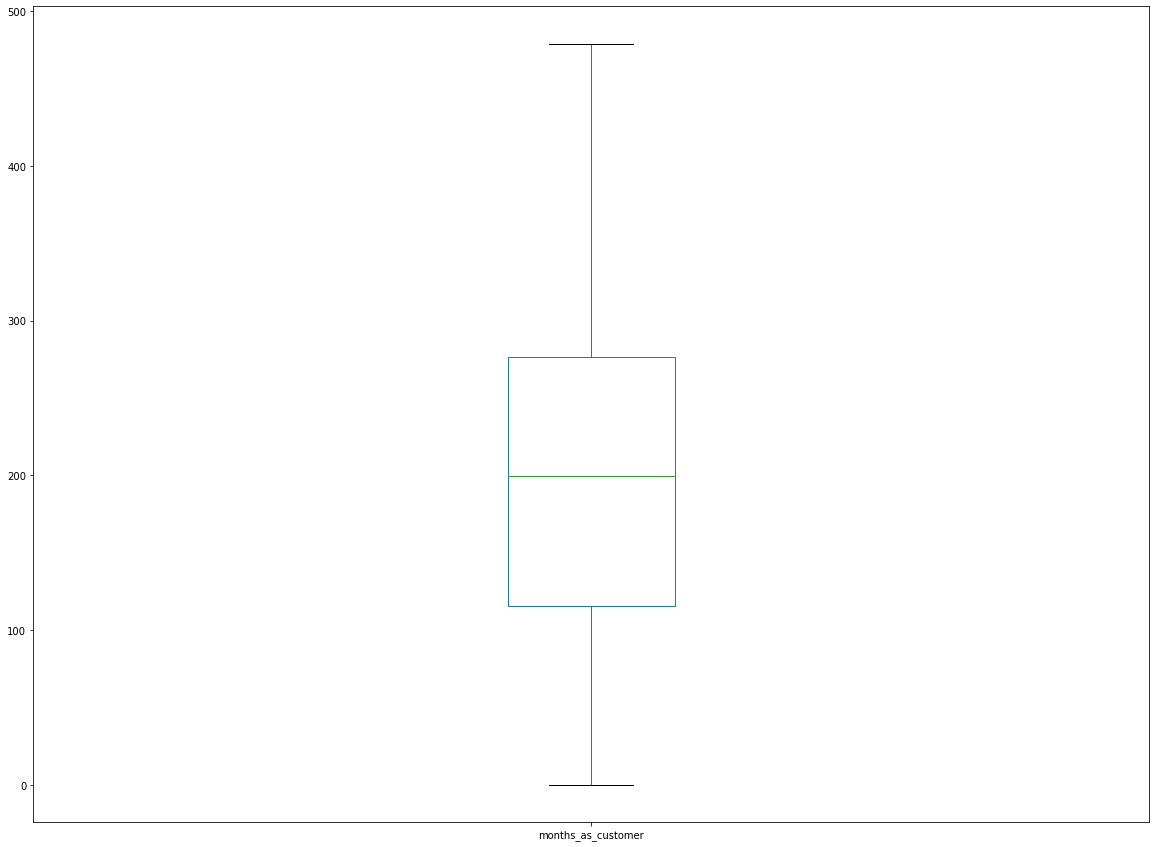

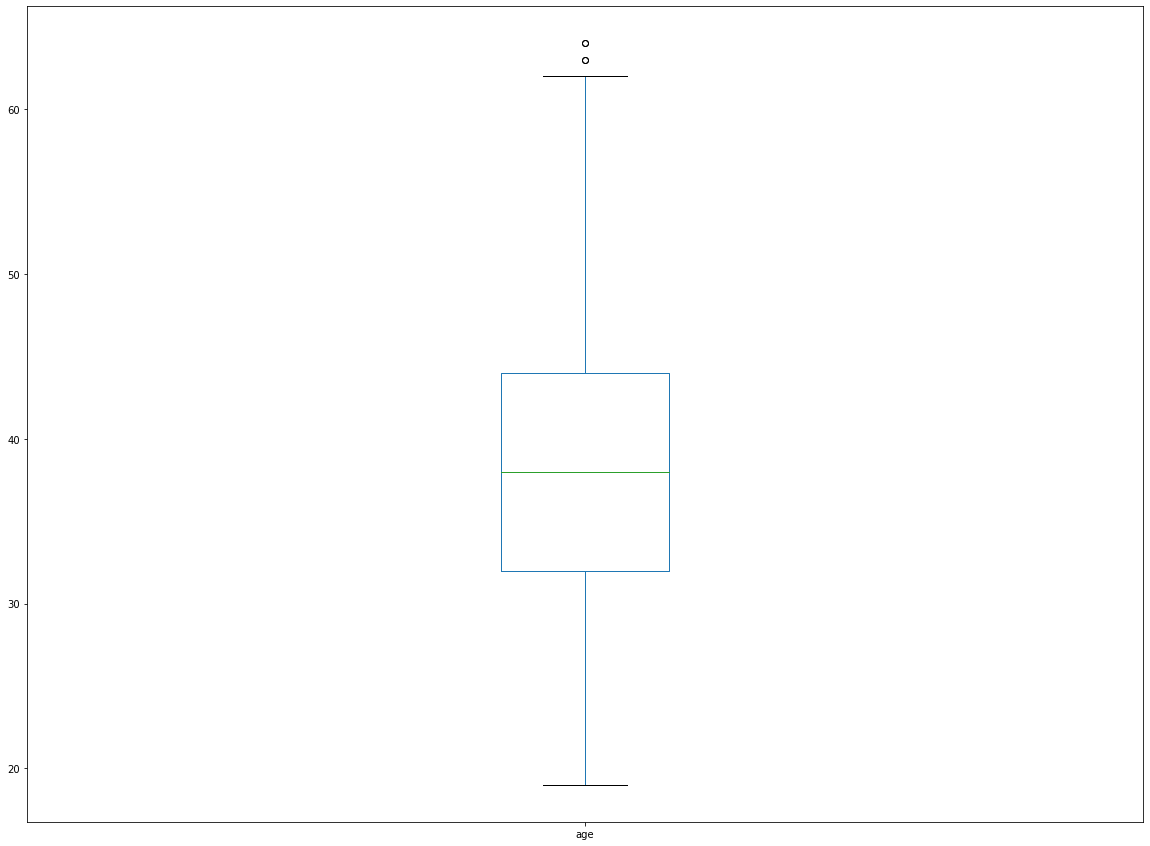

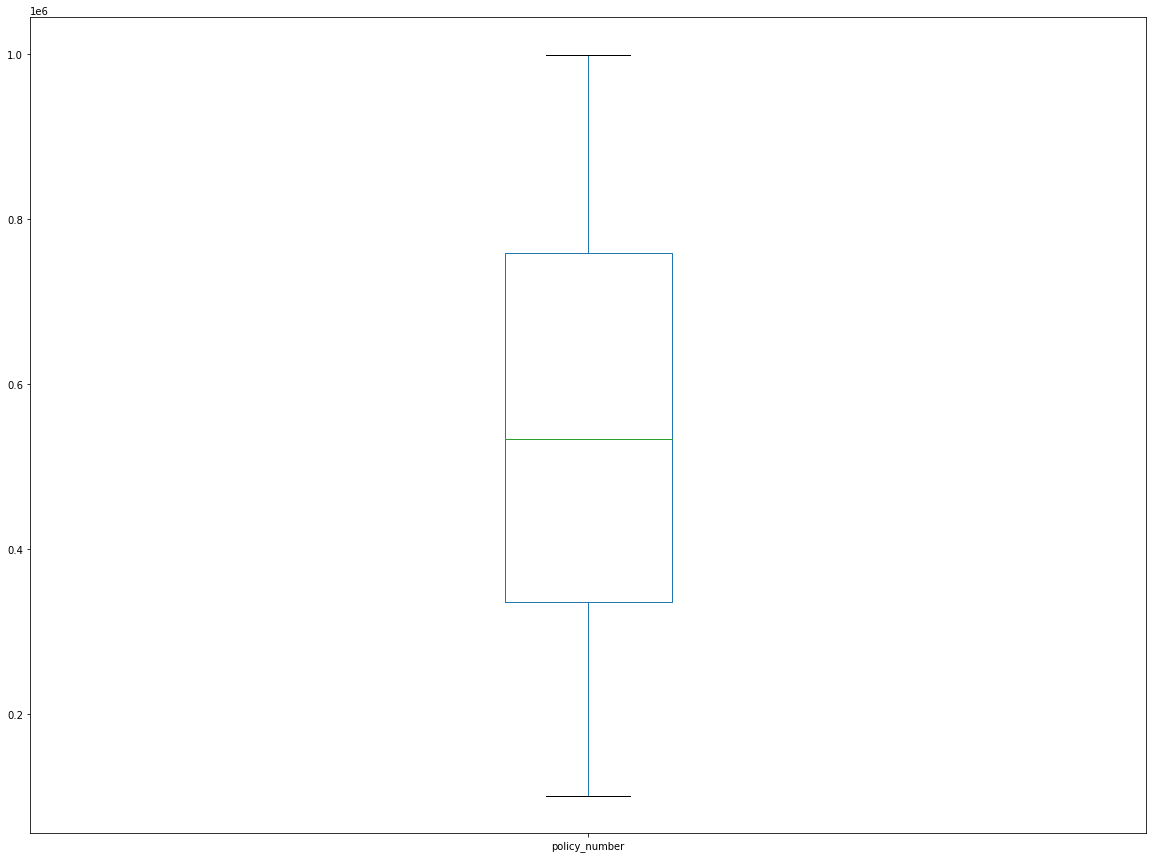

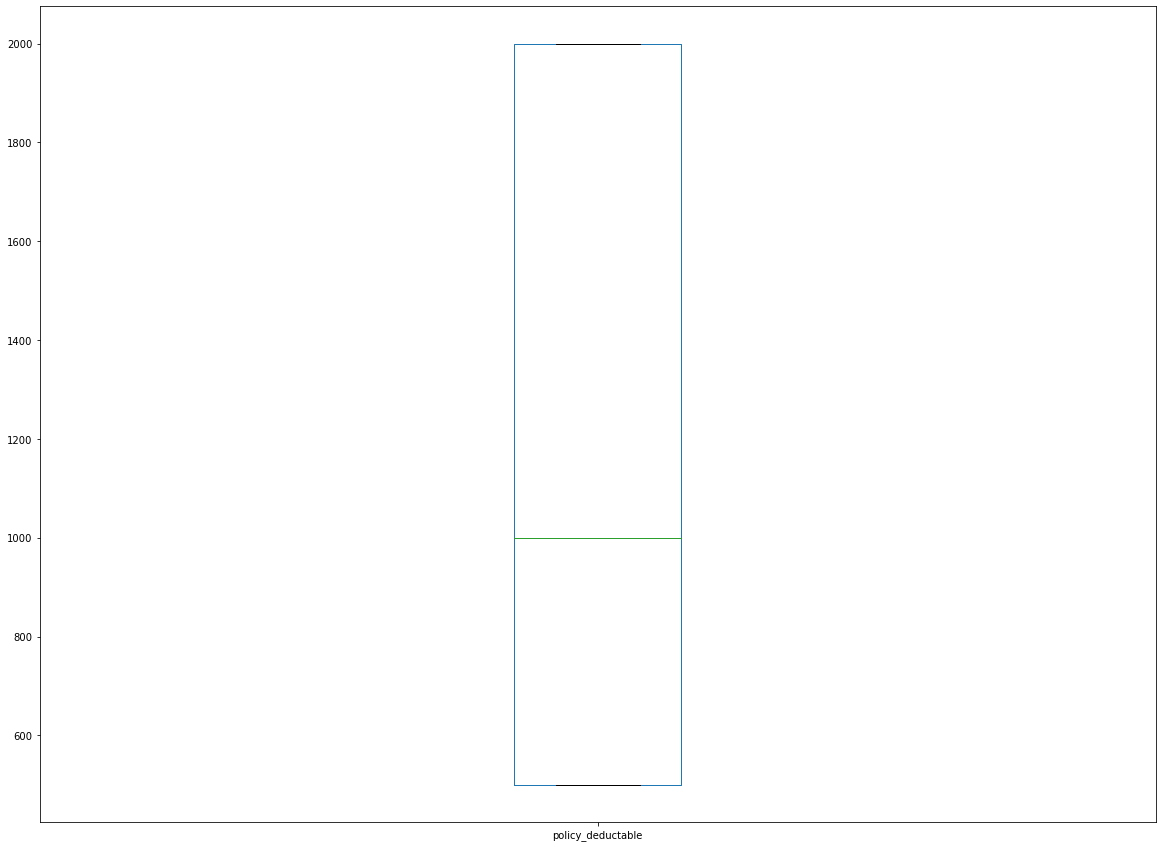

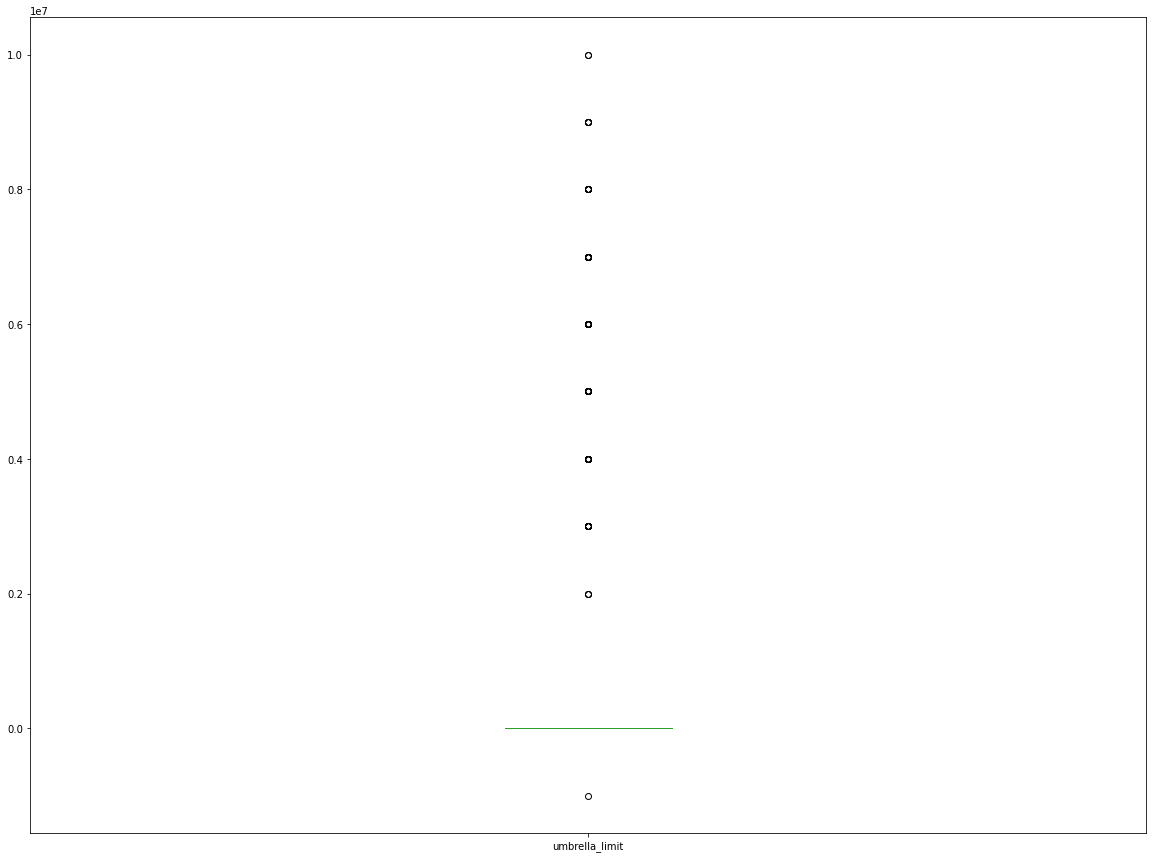

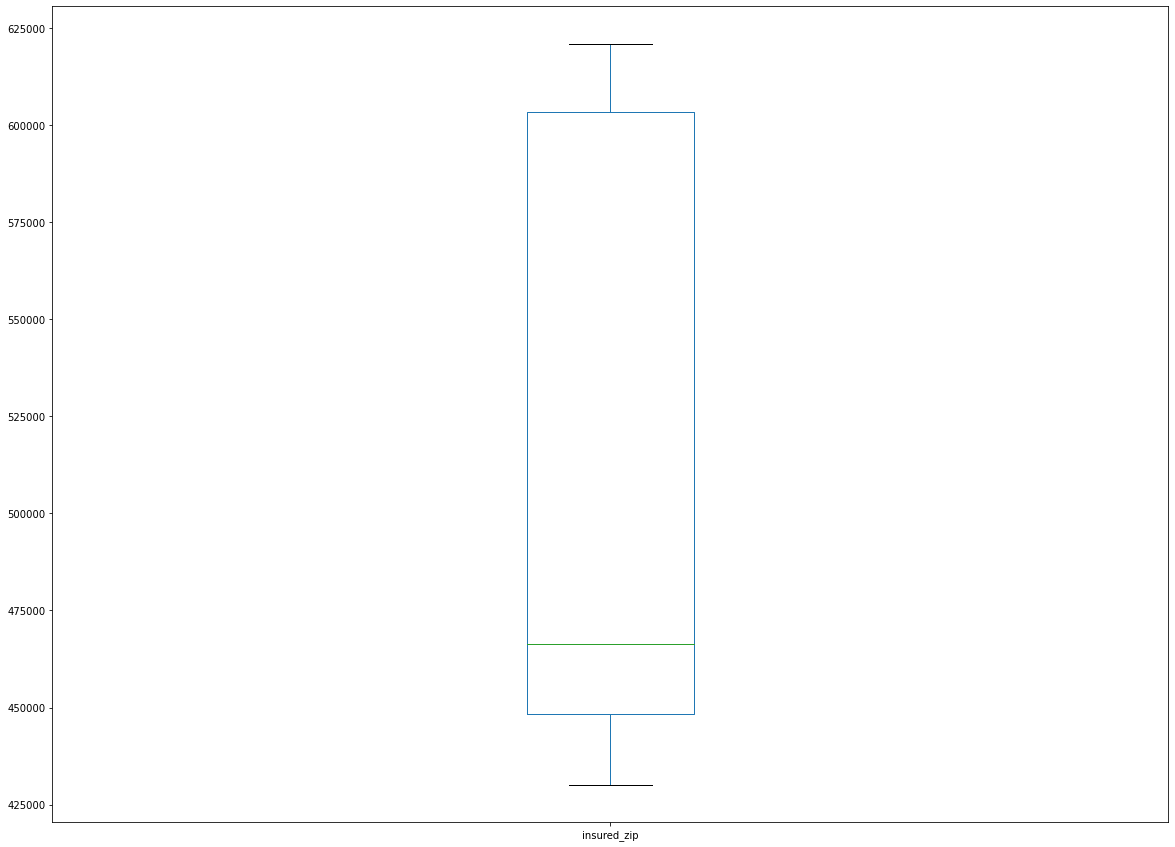

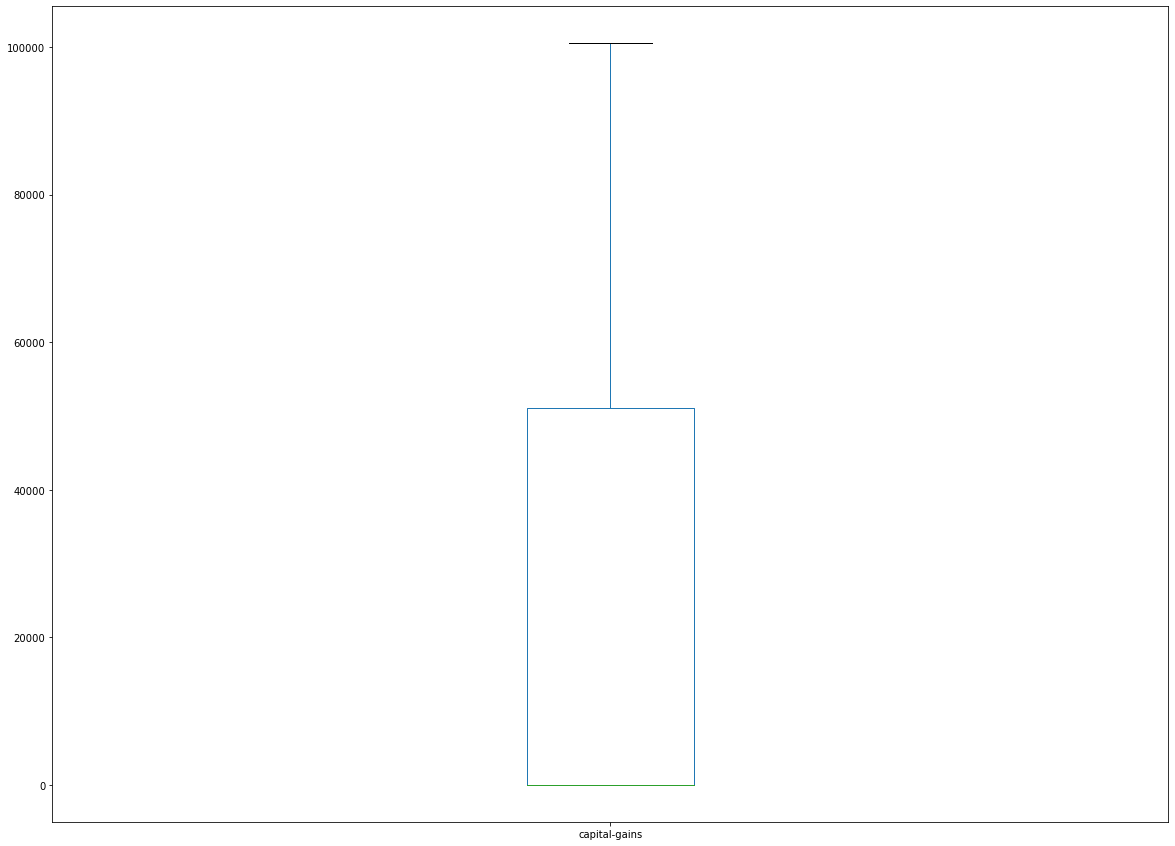

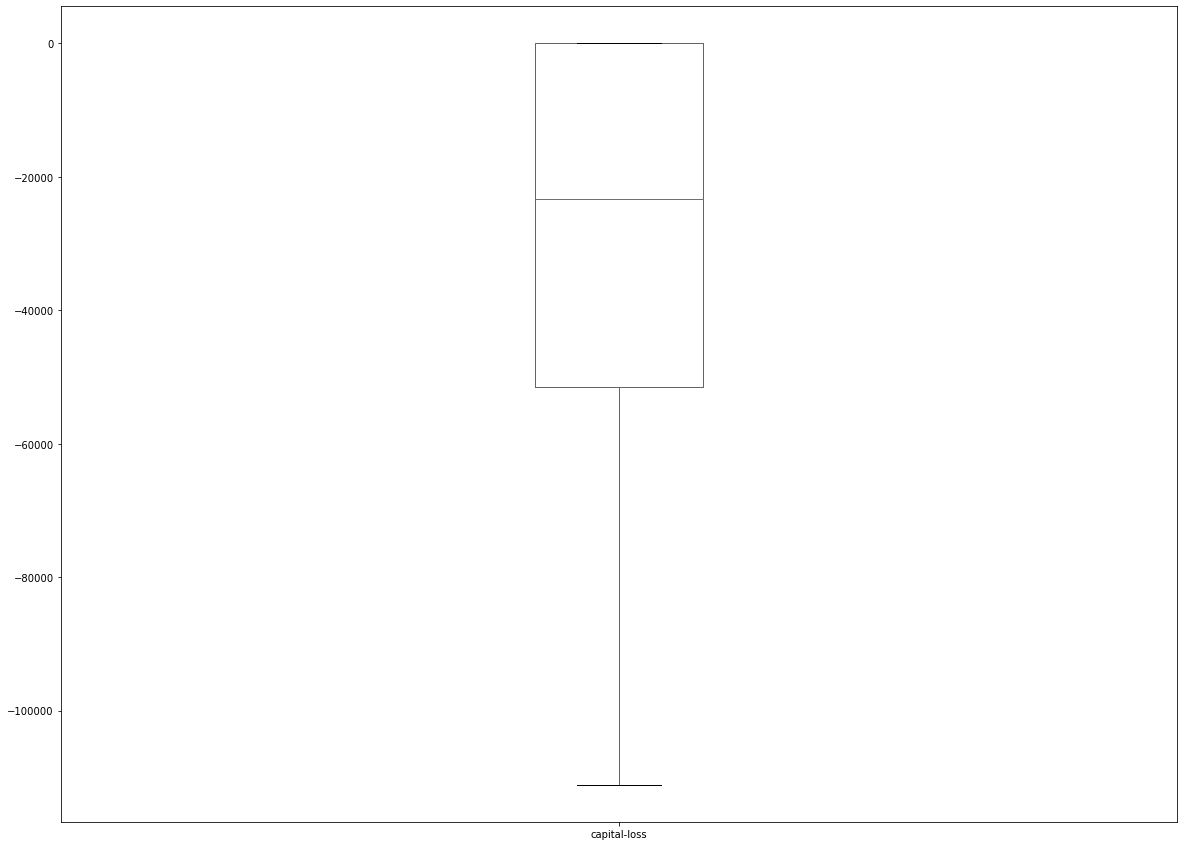

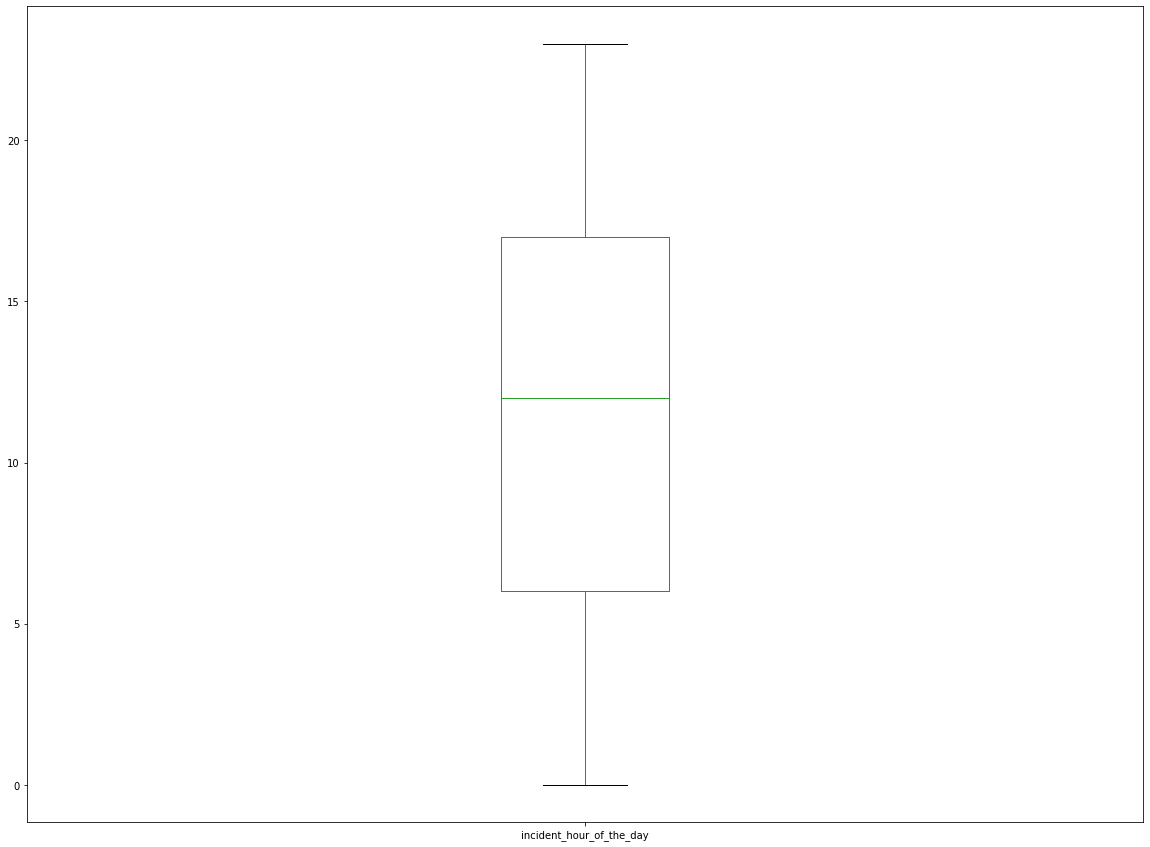

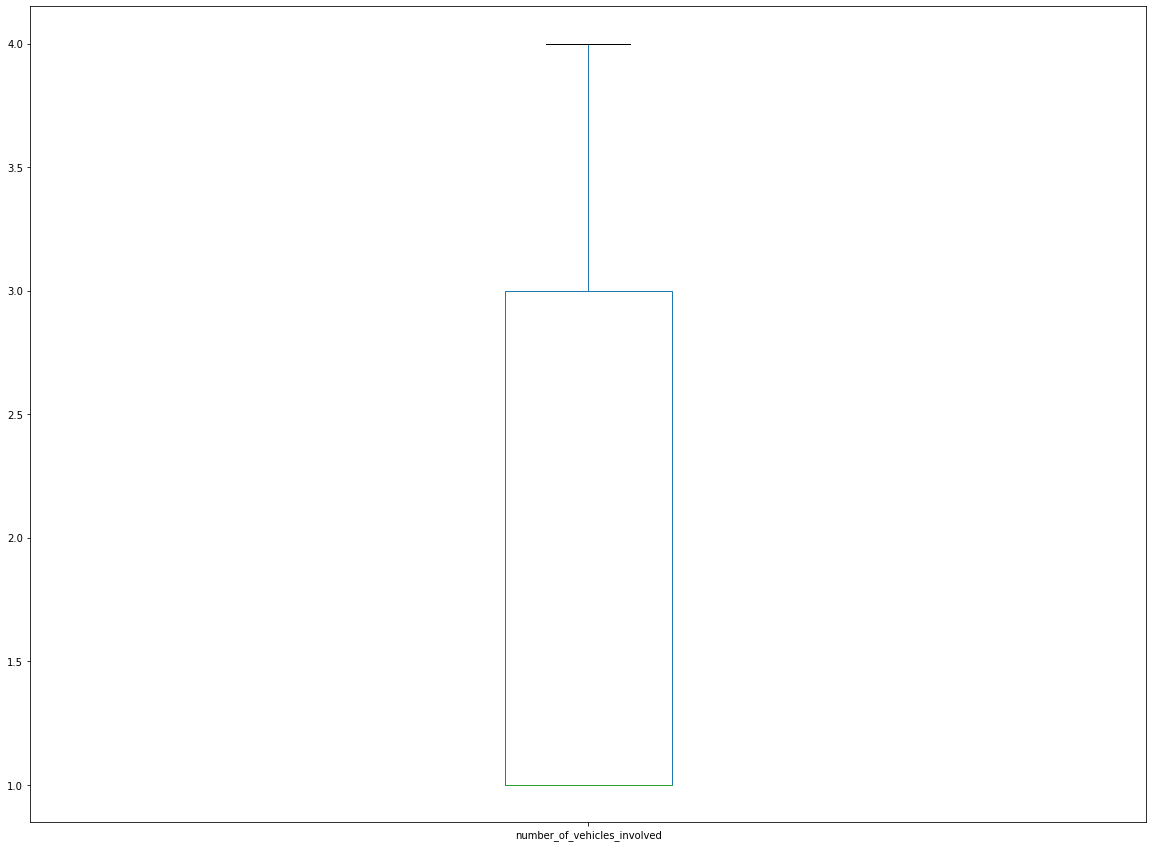

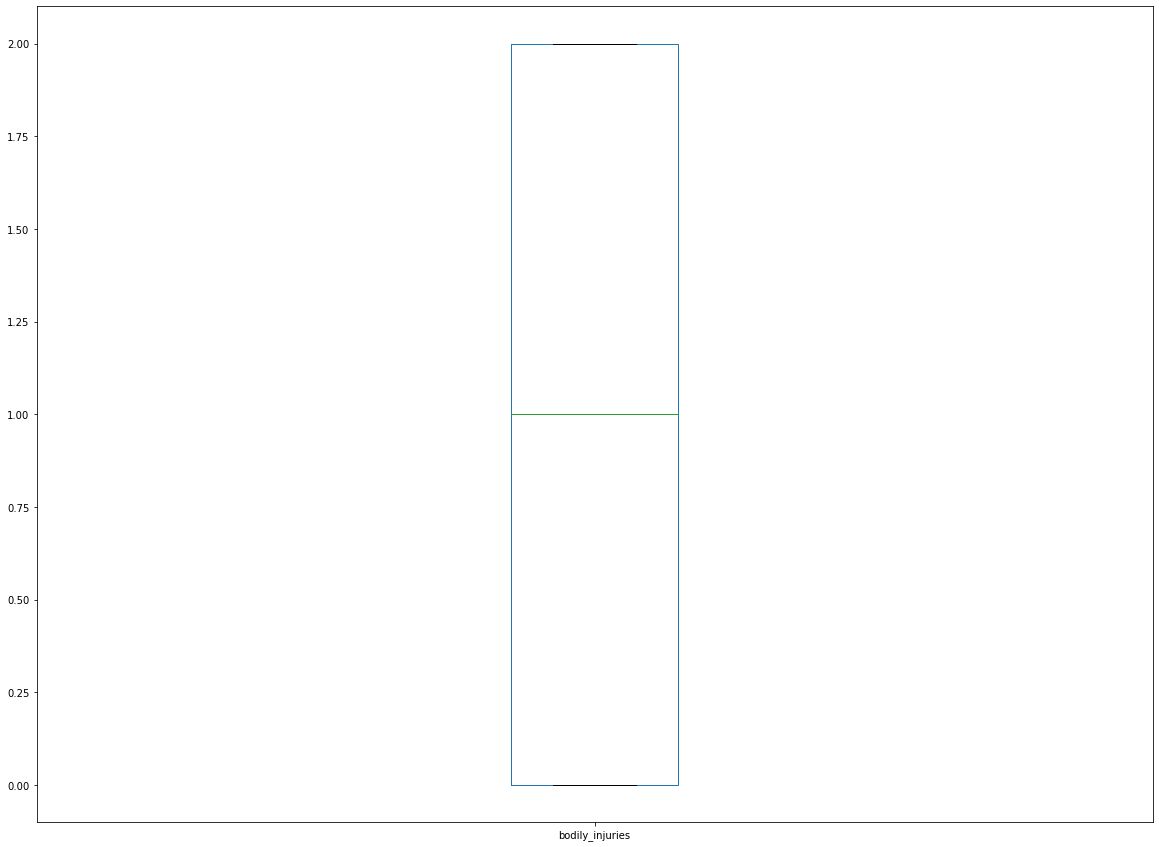

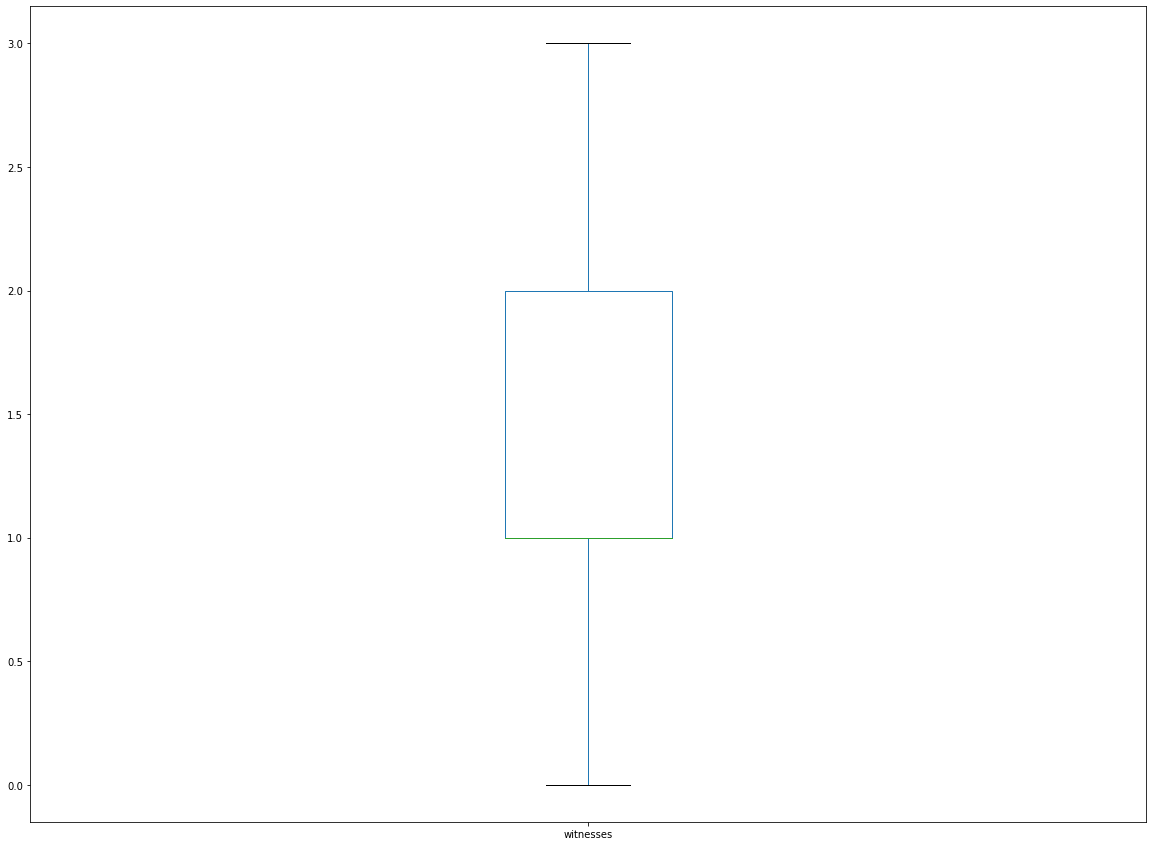

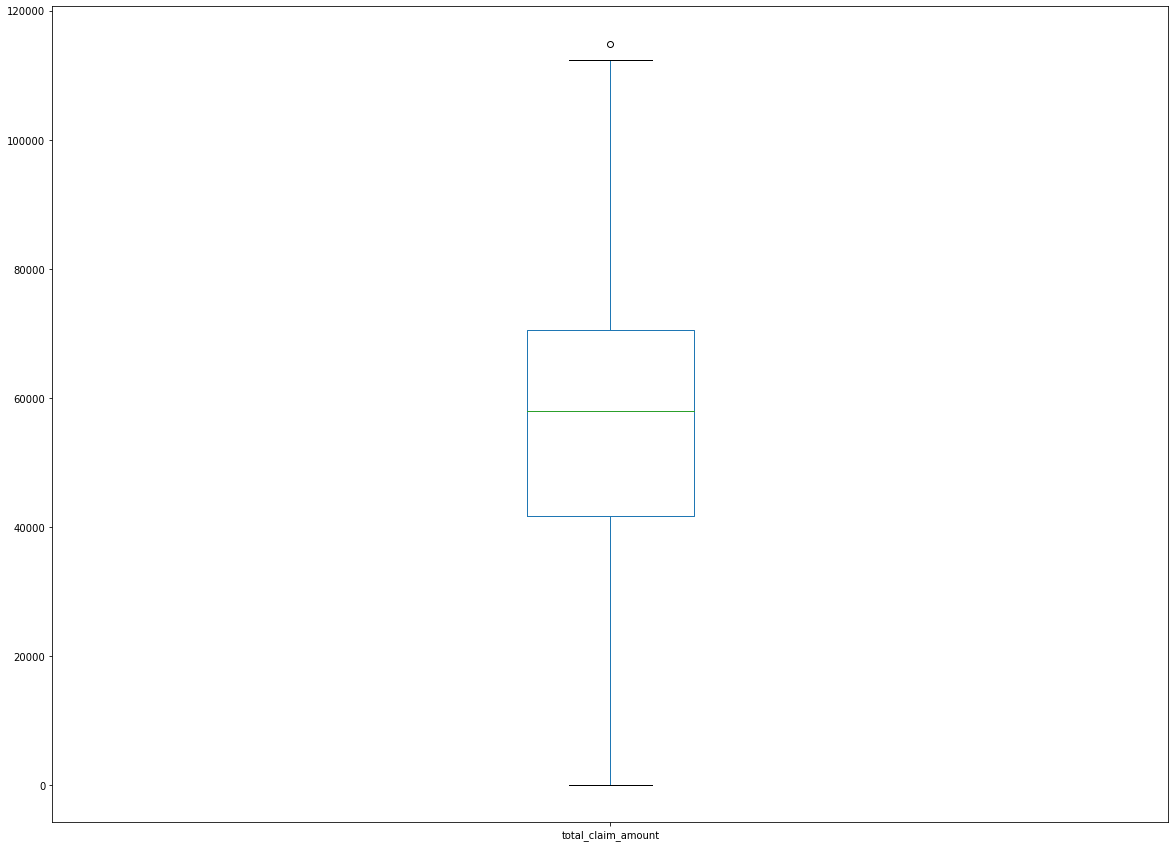

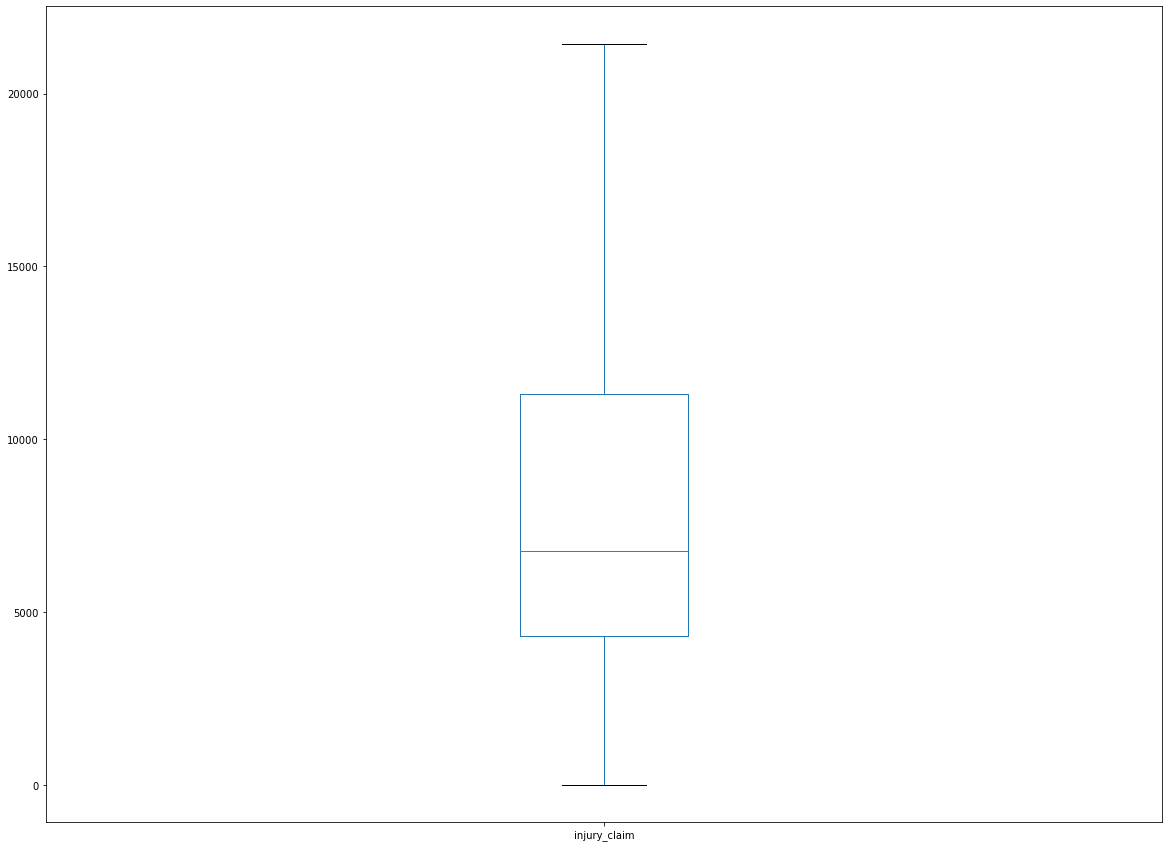

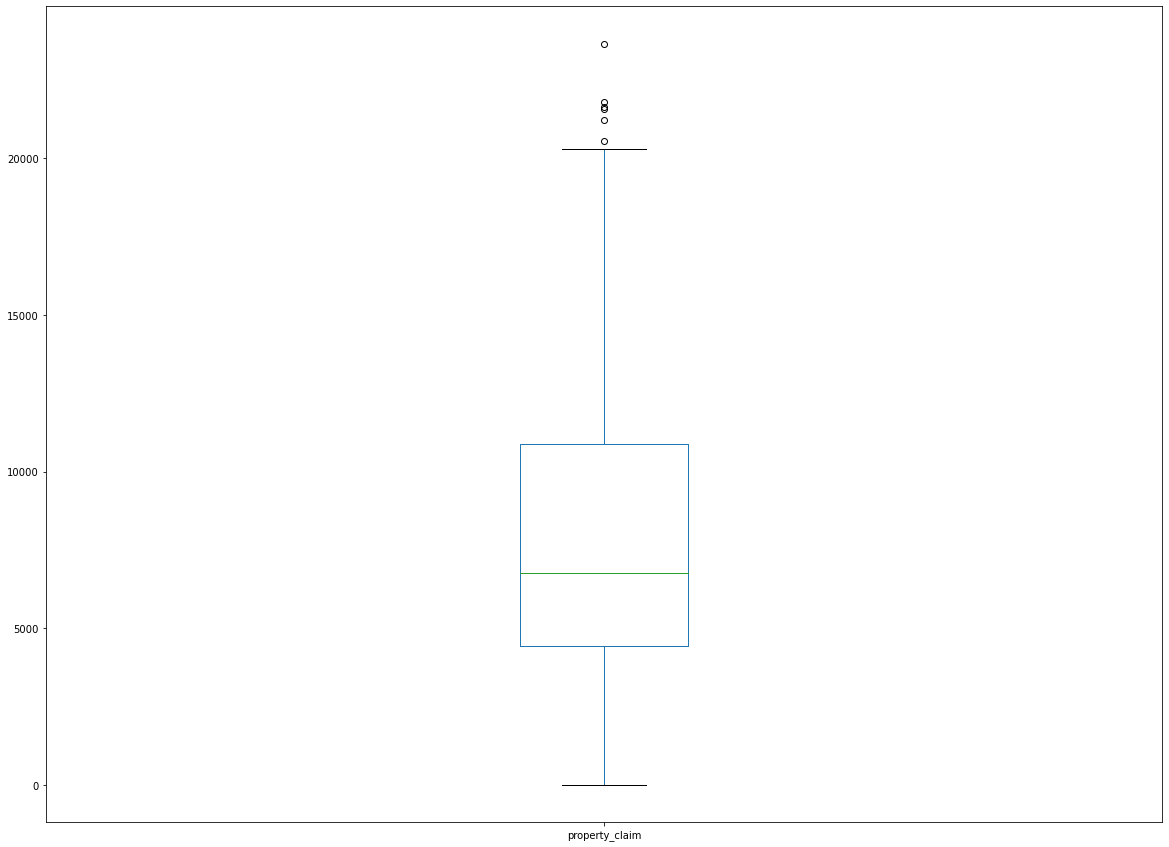

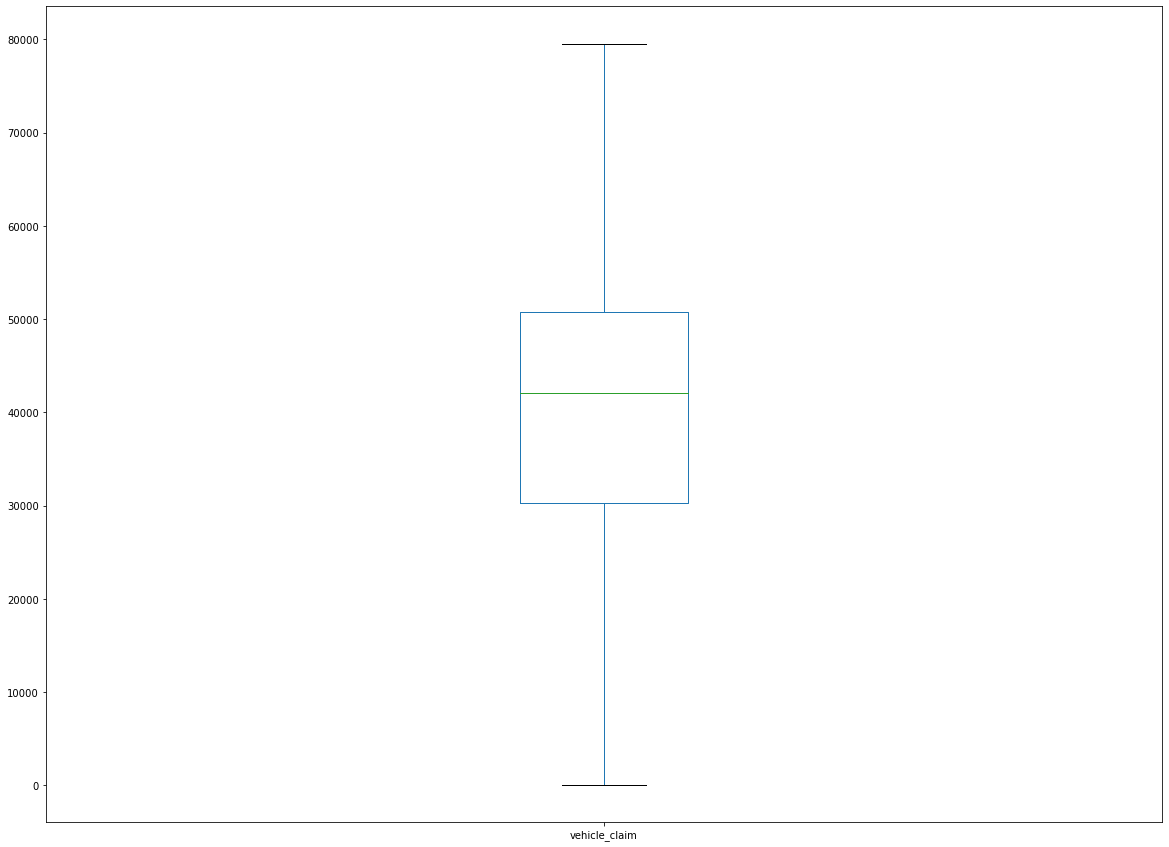

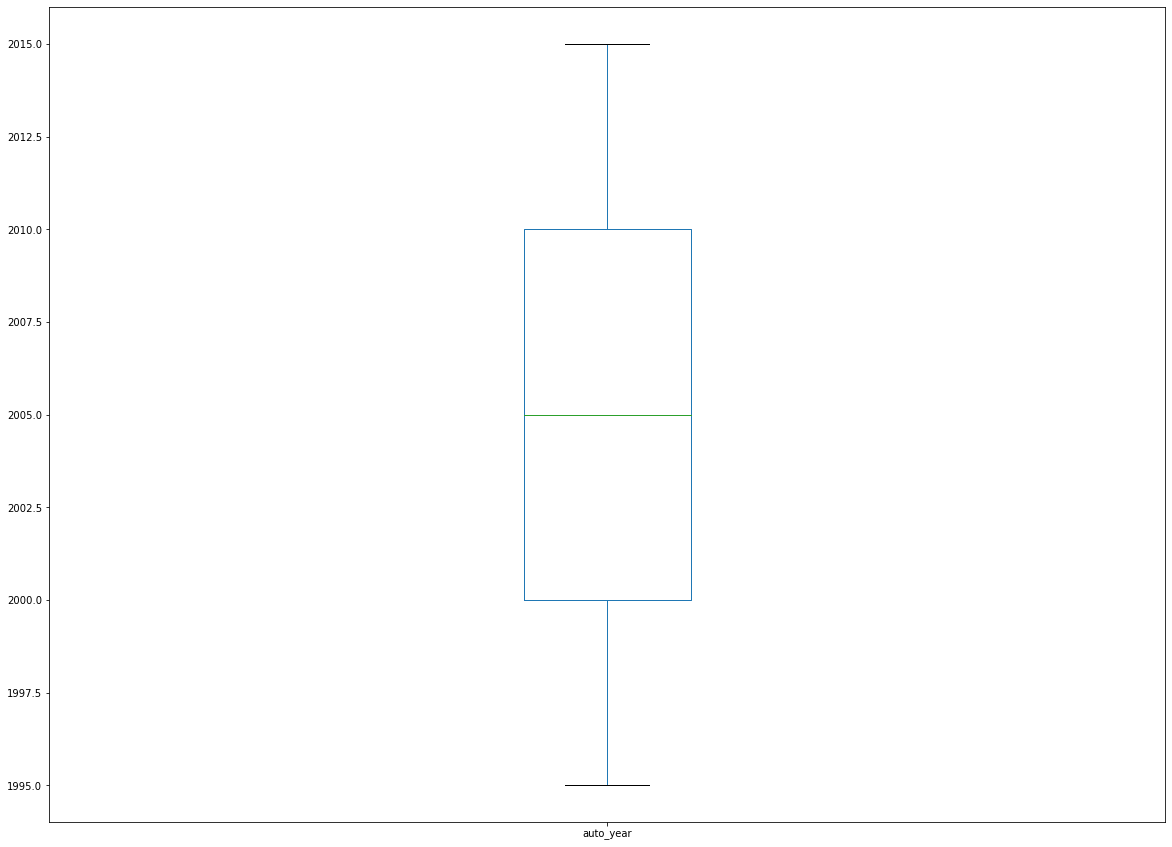

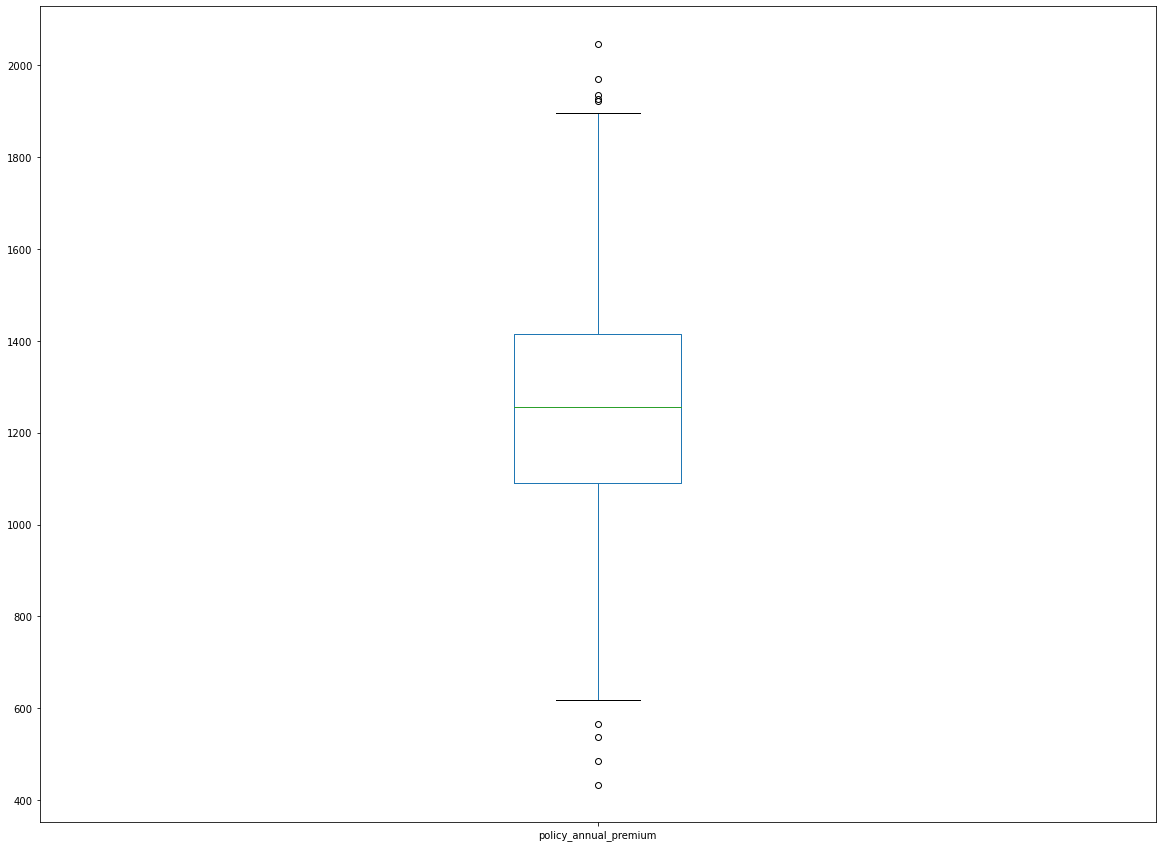

In [32]:
for i in cont_cols:
    plt.figure(figsize = (20, 15))
    df[i].plot.box()

In [33]:
df[cont_cols].skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
policy_annual_premium          0.004402
dtype: float64

In [34]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in cate_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [35]:
x = df.drop('fraud_reported', axis = 1)
y = df['fraud_reported']

In [37]:
maxAccu = 0
maxRS = 0

for i in range (1, 500):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    pred = LR.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print ('Max Accuracy obtained is', maxAccu, 'on Random State', maxRS)

Max Accuracy obtained is 0.81 on Random State 16


In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 373)

In [39]:
LR = LogisticRegression()
DTC = DecisionTreeClassifier()
svc = SVC()
rf = RandomForestClassifier()
models = [LR, DTC, svc, rf]
for i in models:
    print (i)
    i.fit(x_train, y_train)
    pred = i.predict(x_test)
    print (accuracy_score(y_test, pred))
    print (confusion_matrix(y_test, pred))
    print (classification_report(y_test, pred))

LogisticRegression()
0.81
[[241   2]
 [ 55   2]]
              precision    recall  f1-score   support

           0       0.81      0.99      0.89       243
           1       0.50      0.04      0.07        57

    accuracy                           0.81       300
   macro avg       0.66      0.51      0.48       300
weighted avg       0.75      0.81      0.74       300

DecisionTreeClassifier()
0.79
[[203  40]
 [ 23  34]]
              precision    recall  f1-score   support

           0       0.90      0.84      0.87       243
           1       0.46      0.60      0.52        57

    accuracy                           0.79       300
   macro avg       0.68      0.72      0.69       300
weighted avg       0.81      0.79      0.80       300

SVC()
0.81
[[243   0]
 [ 57   0]]
              precision    recall  f1-score   support

           0       0.81      1.00      0.90       243
           1       0.00      0.00      0.00        57

    accuracy                           0.81   

In [40]:
for i in models:
    cvs = cross_val_score(i, x, y, cv = 5)
    print ('Cross Validation Score for ',i, ' model is :', cvs.mean())
    print (' ')

Cross Validation Score for  LogisticRegression()  model is : 0.751
 
Cross Validation Score for  DecisionTreeClassifier()  model is : 0.7899999999999999
 
Cross Validation Score for  SVC()  model is : 0.7529999999999999
 
Cross Validation Score for  RandomForestClassifier()  model is : 0.7740000000000001
 
